# ***Mobile Price Classification Using Machine Learning***

### *Introduction:*
- In todays market, mobile phones come in a wide range of prices, each offering different features and 
specifications. For consumers, selecting a mobile phone that aligns with their budget and requirements 
can be challenging. To assist consumers in making informed decisions, this project aims to develop a 
machine learning model that can classify mobile phones into different price ranges based on their 
features.
### *Problem Statement:*
- The task is to build a predictive model that can accurately classify mobile phones into predefined price 
ranges based on various attributes such as battery power, camera features, memory, connectivity options, 
and more. The dataset provided contains information about several mobile phones, including their 
specifications and corresponding price ranges.


### **Importing Libraries and File Reading**

In [1]:
# Importing Required Liabraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading data from external CSV files into DataFrames
train_df = pd.read_csv(r"D:\\Python Data\\Projects\\Mentorness Internship Projects\\ML Internship Task 2\\Datasets\\train.csv")
test_df = pd.read_csv(r"D:\\Python Data\\Projects\\Mentorness Internship Projects\\ML Internship Task 2\\Datasets\\test.csv")

In [3]:
# Displays the first 5 rows of train dataset
train_df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# Displays the first 5 rows of test dataset
test_df.head(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


## **Data Cleaning**

In [5]:
# Checking shape of datasets
print(f'Shape of train dataset: ', train_df.shape)
print(f'Shape of test dataset: ', test_df.shape)

Shape of train dataset:  (2000, 21)
Shape of test dataset:  (1000, 21)


In [6]:
# Column headers in the datasets
print(f'Train dataset columns: ', train_df.columns)
print(f'Test dataset columns: ', test_df.columns)

Train dataset columns:  Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
Test dataset columns:  Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


In [7]:
# Dropping 'id' column from test dataset
test_df = test_df.drop('id', axis=1)
print("Column headers in dataset : ", test_df.columns)

Column headers in dataset :  Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


In [8]:
# Information about train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
# Information about test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

In [10]:
# Missing Values/Null Values Counts in train dataset
train_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
# Missing Values/Null Values Counts test dataset
test_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

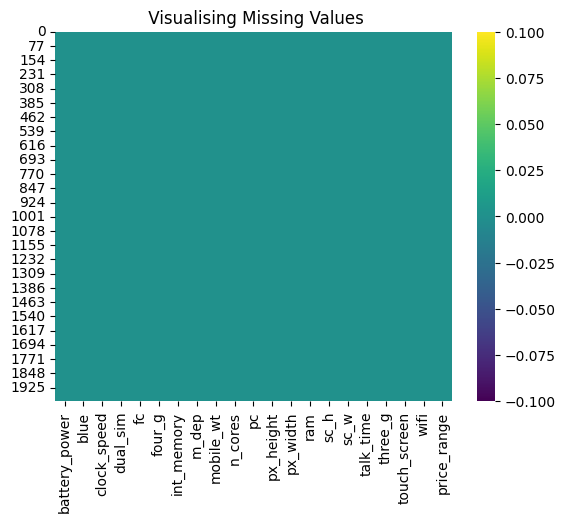

In [12]:
 # Visualizing the missing values in train dataset
sns.heatmap(train_df.isnull(), cmap='viridis', cbar=True)
plt.title(" Visualising Missing Values")

### **Understanding Variables**

#### The dataset comprises the following columns:
- **battery_power:** Total energy a battery can store in mAh.
- **blue:** Bluetooth enabled (1 if yes, 0 if no).
- **clock_speed:** Speed at which microprocessor executes instructions.
- **dual_sim:** Dual SIM support (1 if yes, 0 if no).
- **fc:** Front Camera mega pixels.
- **four_g:** 4G network support (1 if yes, 0 if no).
- **int_memory:** Internal Memory (in gigabytes).
- **m_dep:** Mobile Depth in cm.
- **mobile_wt:** Weight of mobile phone.
- **n_cores:** Number of cores of the processor.
- **pc:** Primary Camera mega pixels.
- **px_height:** Pixel Resolution Height.
- **px_width:** Pixel Resolution Width.
- **ram:** Random Access Memory in megabytes.
- **sc_h:** Screen Height of mobile in cm.
- **sc_w:** Screen Width of mobile in cm.
- **talk_time:** Longest time that a single battery charge will last when you are talking.
- **three_g:** 3G network support (1 if yes, 0 if no).
- **touch_screen:** Touch screen support (1 if yes, 0 if no).
- **wifi:** Wifi connectivity (1 if yes, 0 if no).
- **price_range:** Price range of the mobile phone (0 - low cost, 1 - medium cost, 2 - high cost, 3 -very high cost).

In [13]:
# Describing datasets
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [14]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,1000.0,1248.5100,432.458227,500.0,895.00,1246.5,1629.25,1999.0
blue,1000.0,0.5160,0.499994,0.0,0.00,1.0,1.00,1.0
clock_speed,1000.0,1.5409,0.829268,0.5,0.70,1.5,2.30,3.0
dual_sim,1000.0,0.5170,0.499961,0.0,0.00,1.0,1.00,1.0
fc,1000.0,4.5930,4.463325,0.0,1.00,3.0,7.00,19.0
four_g,1000.0,0.4870,0.500081,0.0,0.00,0.0,1.00,1.0
int_memory,1000.0,33.6520,18.128694,2.0,18.00,34.5,49.00,64.0
m_dep,1000.0,0.5175,0.280861,0.1,0.30,0.5,0.80,1.0
mobile_wt,1000.0,139.5110,34.851550,80.0,109.75,139.0,170.00,200.0
n_cores,1000.0,4.3280,2.288155,1.0,2.00,4.0,6.00,8.0


In [15]:
# Checking Unique Values for each variable in train dataset.
for column in train_df.columns:
    unique_values = train_df[column].unique()
    # Sorting unique values in ascending order
    unique_values_sorted = sorted(unique_values)
    # Number of unique values
    num_unique_values = train_df[column].nunique()

    print(f"Column '{column}':")
    print(f"Number of unique values: {num_unique_values}")
    print(f"Unique values (ascending order): {unique_values_sorted}")

Column 'battery_power':
Number of unique values: 1094
Unique values (ascending order): [501, 502, 503, 504, 506, 507, 508, 509, 510, 511, 512, 513, 514, 516, 517, 518, 519, 520, 523, 525, 527, 528, 530, 531, 532, 534, 535, 536, 537, 538, 539, 541, 543, 544, 545, 546, 547, 548, 550, 551, 553, 554, 555, 557, 558, 559, 560, 561, 563, 564, 565, 568, 569, 570, 571, 574, 576, 577, 578, 579, 580, 581, 582, 583, 584, 586, 587, 589, 590, 591, 592, 593, 594, 595, 596, 598, 599, 600, 601, 602, 603, 605, 606, 608, 609, 610, 612, 614, 615, 616, 617, 618, 621, 622, 623, 625, 626, 627, 628, 630, 633, 634, 635, 636, 637, 638, 640, 641, 642, 643, 644, 645, 648, 649, 651, 652, 654, 657, 658, 659, 660, 662, 663, 664, 665, 666, 667, 668, 671, 672, 673, 674, 675, 676, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 691, 694, 695, 696, 697, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 712, 713, 714, 715, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 737, 739, 74

In [16]:
# Checking Unique Values for each variable in test dataset.
for column in test_df.columns:
    unique_values = test_df[column].unique()
    # Sorting unique values in ascending order
    unique_values_sorted = sorted(unique_values)
    # Number of unique values
    num_unique_values = test_df[column].nunique()

    print(f"Column '{column}':")
    print(f"Number of unique values: {num_unique_values}")
    print(f"Unique values (ascending order): {unique_values_sorted}")

Column 'battery_power':
Number of unique values: 721
Unique values (ascending order): [500, 504, 507, 510, 511, 517, 518, 519, 520, 521, 524, 529, 530, 532, 533, 534, 535, 536, 541, 542, 543, 544, 546, 547, 549, 553, 556, 557, 558, 559, 560, 562, 564, 567, 569, 572, 574, 575, 576, 578, 579, 582, 583, 586, 588, 590, 591, 597, 600, 602, 603, 607, 608, 609, 613, 617, 621, 623, 624, 626, 628, 630, 632, 635, 636, 639, 640, 643, 644, 645, 646, 649, 650, 651, 652, 654, 656, 657, 658, 660, 664, 666, 667, 669, 671, 674, 675, 676, 679, 681, 683, 685, 687, 690, 694, 695, 697, 700, 701, 702, 703, 706, 708, 709, 710, 712, 716, 717, 718, 721, 723, 725, 726, 727, 732, 733, 734, 735, 739, 740, 743, 744, 750, 756, 757, 758, 761, 762, 763, 767, 768, 769, 770, 776, 781, 782, 785, 786, 788, 790, 792, 794, 795, 796, 797, 800, 803, 804, 805, 812, 815, 817, 819, 820, 822, 823, 825, 829, 831, 833, 837, 839, 840, 841, 842, 844, 848, 852, 853, 854, 859, 861, 863, 868, 871, 873, 875, 876, 877, 880, 881, 882, 885

## **Data Wrangling**

In [17]:
"""
    The minimum value of px_height and sc_w should not be 0, as it does not make sense for a phone screen width or pixel height to be 0.
    Therefore, we should check for and handle these cases appropriately to avoid any issues with our analysis.
"""

# count number of phones with sc_w = 0 in train dataset
sc_w_zero_train = sum(train_df.sc_w == 0)
print(f"Number of phones with sc_w in train dataset= 0: {sc_w_zero_train}")
# count number of phones with px_height = 0 in train dataset
px_height_zero_train = sum(train_df.px_height == 0)
print(f"Number of phones with px_height = 0 in train dataset: {px_height_zero_train}")
# count number of phones with sc_w = 0 in test dataset
sc_w_zero_train = sum(test_df.sc_w == 0)
print(f"Number of phones with sc_w in test dataset= 0: {sc_w_zero_train}")
# count number of phones with px_height = 0 in test dataset
px_height_zero_train = sum(test_df.px_height == 0)
print(f"Number of phones with px_height = 0 in test dataset: {px_height_zero_train}")

Number of phones with sc_w in train dataset= 0: 180
Number of phones with px_height = 0 in train dataset: 2
Number of phones with sc_w in test dataset= 0: 112
Number of phones with px_height = 0 in test dataset: 2


#### Nearest Neighbors Imputations (KNNImputer)

Missing values are imputed using the k-Nearest Neighbors approach where a Euclidean distance is used to find the nearest neighbors.

Let’s take the above example of the dataset to see how it works.
- Before using KNN Imputer we need to replace 0 with NAN values. so that it will work.

In [18]:
"""
    Replacing 0 with NAN so that we can implement KNN Imputer.
                                                                """

train_df['sc_w'].replace(0, np.nan, inplace=True)
train_df['px_height'].replace(0, np.nan, inplace=True)
test_df['sc_w'].replace(0, np.nan, inplace=True)
test_df['px_height'].replace(0, np.nan, inplace=True)

# Count number of NaN values after replacement in both datasets
print(f"Number of phones with sc_w = NaN in train dataset: {train_df['sc_w'].isnull().sum()}")
print(f"Number of phones with px_height = NaN in train dataset: {train_df['px_height'].isnull().sum()}")
print(f"Number of phones with sc_w = NaN in test dataset: {test_df['sc_w'].isnull().sum()}")
print(f"Number of phones with px_height = NaN in test dataset: {test_df['px_height'].isnull().sum()}")

Number of phones with sc_w = NaN in train dataset: 180
Number of phones with px_height = NaN in train dataset: 2
Number of phones with sc_w = NaN in test dataset: 112
Number of phones with px_height = NaN in test dataset: 2


In [19]:
# importing KNN imputer from sklearn
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Performing KNN imputation in the dataset
train_df = pd.DataFrame(imputer.fit_transform(train_df), columns=train_df.columns)
test_df = pd.DataFrame(imputer.fit_transform(test_df), columns=test_df.columns)

In [20]:
# Duplicates Value Count
print("Number of duplicated values in the dataset:", len(train_df[train_df.duplicated()]))
print("Number of duplicated values in the dataset:", len(test_df[test_df.duplicated()]))

Number of duplicated values in the dataset: 0
Number of duplicated values in the dataset: 0


## **EDA( Exploratory Data Analysis)**

In [21]:
# lets have a look at our target variable's counts
price_range_values=train_df['price_range'].value_counts()
print(price_range_values)

price_range
1.0    500
2.0    500
3.0    500
0.0    500
Name: count, dtype: int64


***We have equal number of obseravtions for each category. Thus we don't have imbalanced target variable. Accuracy score will be the best evalaution metric for us to select the model.***

***This is the target variable with value of***
* ***0=low cost,***
* ***1=medium cost,***
* ***2=high cost,***
* ***3=very high cost.***

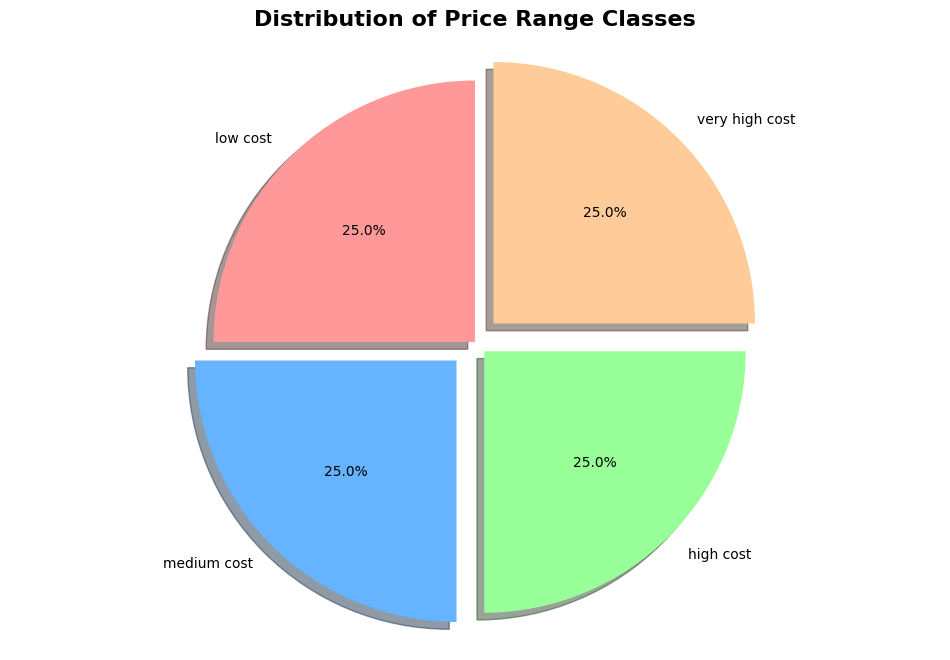

In [22]:
# Visualizing the Target variable's class distribution.
labels = ["low cost", "medium cost", "high cost", "very high cost"]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0.0, 0.1, 0.05, 0.1)

plt.figure(figsize=(12, 8))

plt.pie(price_range_values, labels=labels, autopct='%1.1f%%', 
        startangle=90, explode=explode, colors=colors, shadow=True)

plt.title("Distribution of Price Range Classes", fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

### *Correlation of target varaible i.e Dependent variable with the other independent variable.*

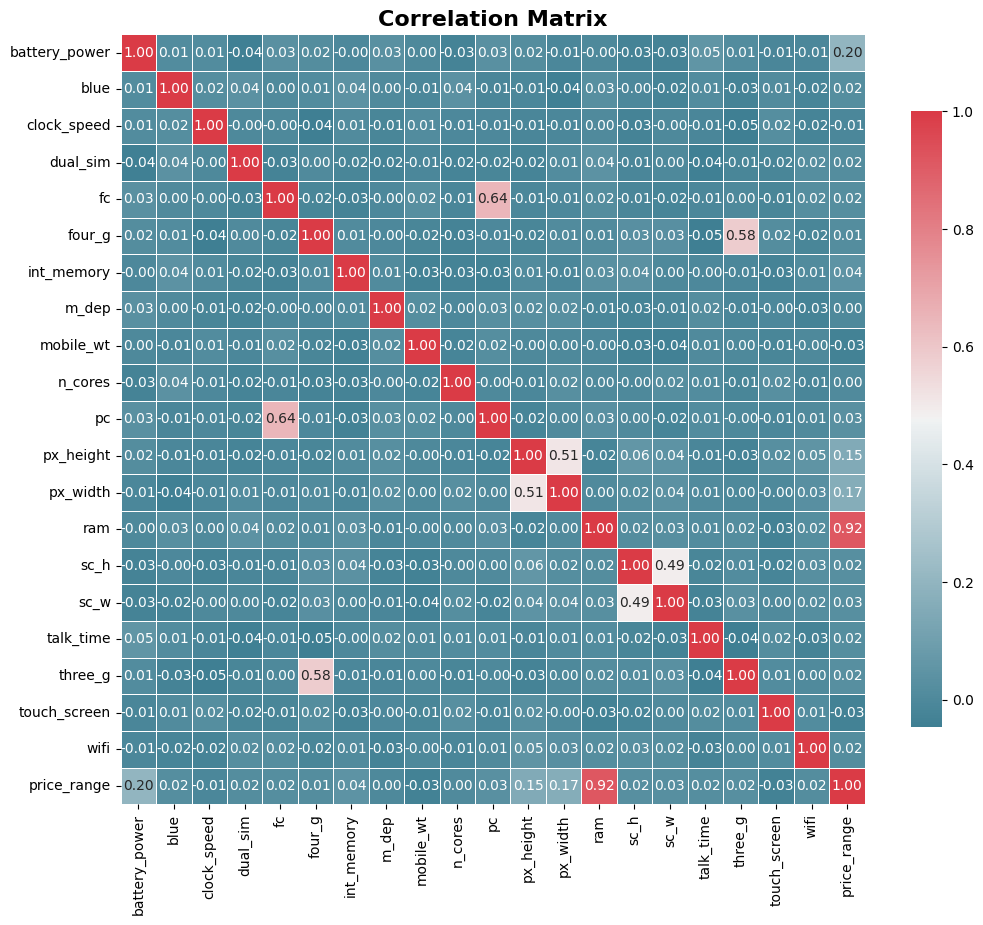

In [23]:
# Calculating correlation matrix
corr = train_df.corr()
plt.figure(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Creating heatmap with annotations
sns.heatmap(corr, annot=True, fmt='.2f', 
            cmap=cmap, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.show()

#### **Observations:**
* ***RAM has strong positive correlation with the Price_range. and we know that Mobiles with high RAM are very costly. Thus RAM increases price range also increase.***
* ***Battery_power also has positive correlation with the price range.Generally mobiles having high prices comes with good battery power.***
* ***Also px_height and px_width (Pixel Resolution Height and width) are positively correlated. Generally High price range mobiles have good resolutions.***

* ***Four_g and Three_g are highly positvely correlated. Nowdays most of the smart mobiles has both type of options. This could be the reason that they are correlated.***

* ***primary camera i.e pc and front camera fc are positively correlated.***
* ***sc_h and sc_w are positively correlated.***

#### **Univariate Analysis of Categorical columns.**

In [24]:
# Checking column headers of the dataset
train_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

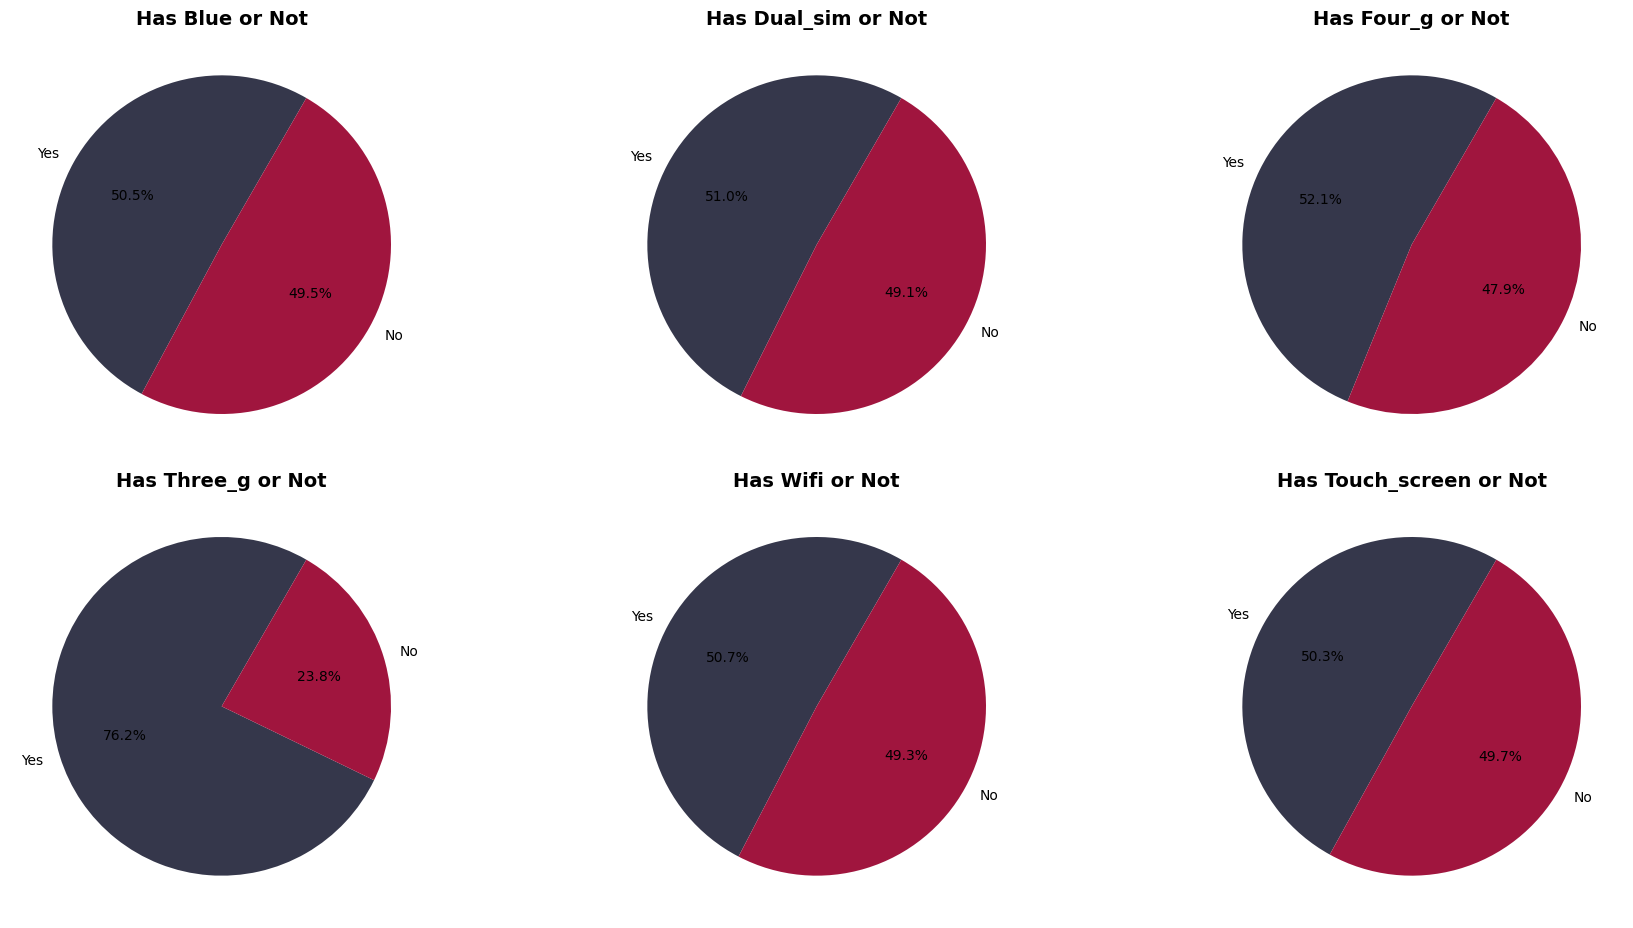

In [25]:
# Plotting the pie-charts for binary categorical variables.

## Define the binary categorical variables
var_list = ['blue', 'dual_sim', 'four_g', 'three_g', 'wifi', 'touch_screen']
labels = ['Yes', 'No']

## Setting up subplots for multiple pie charts
plt.figure(figsize=(18, 14))

## Loop through each variable and create a pie chart
for i, var in enumerate(var_list, 1):
    plt.subplot(3, 3, i)
    value_counts = train_df[var].value_counts()
    plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=60, colors=['#35374B', '#A0153E'])
    plt.title(f'Has {var.capitalize()} or Not', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#### *Relation Between RAM,Battery_power,px_height and px_width*

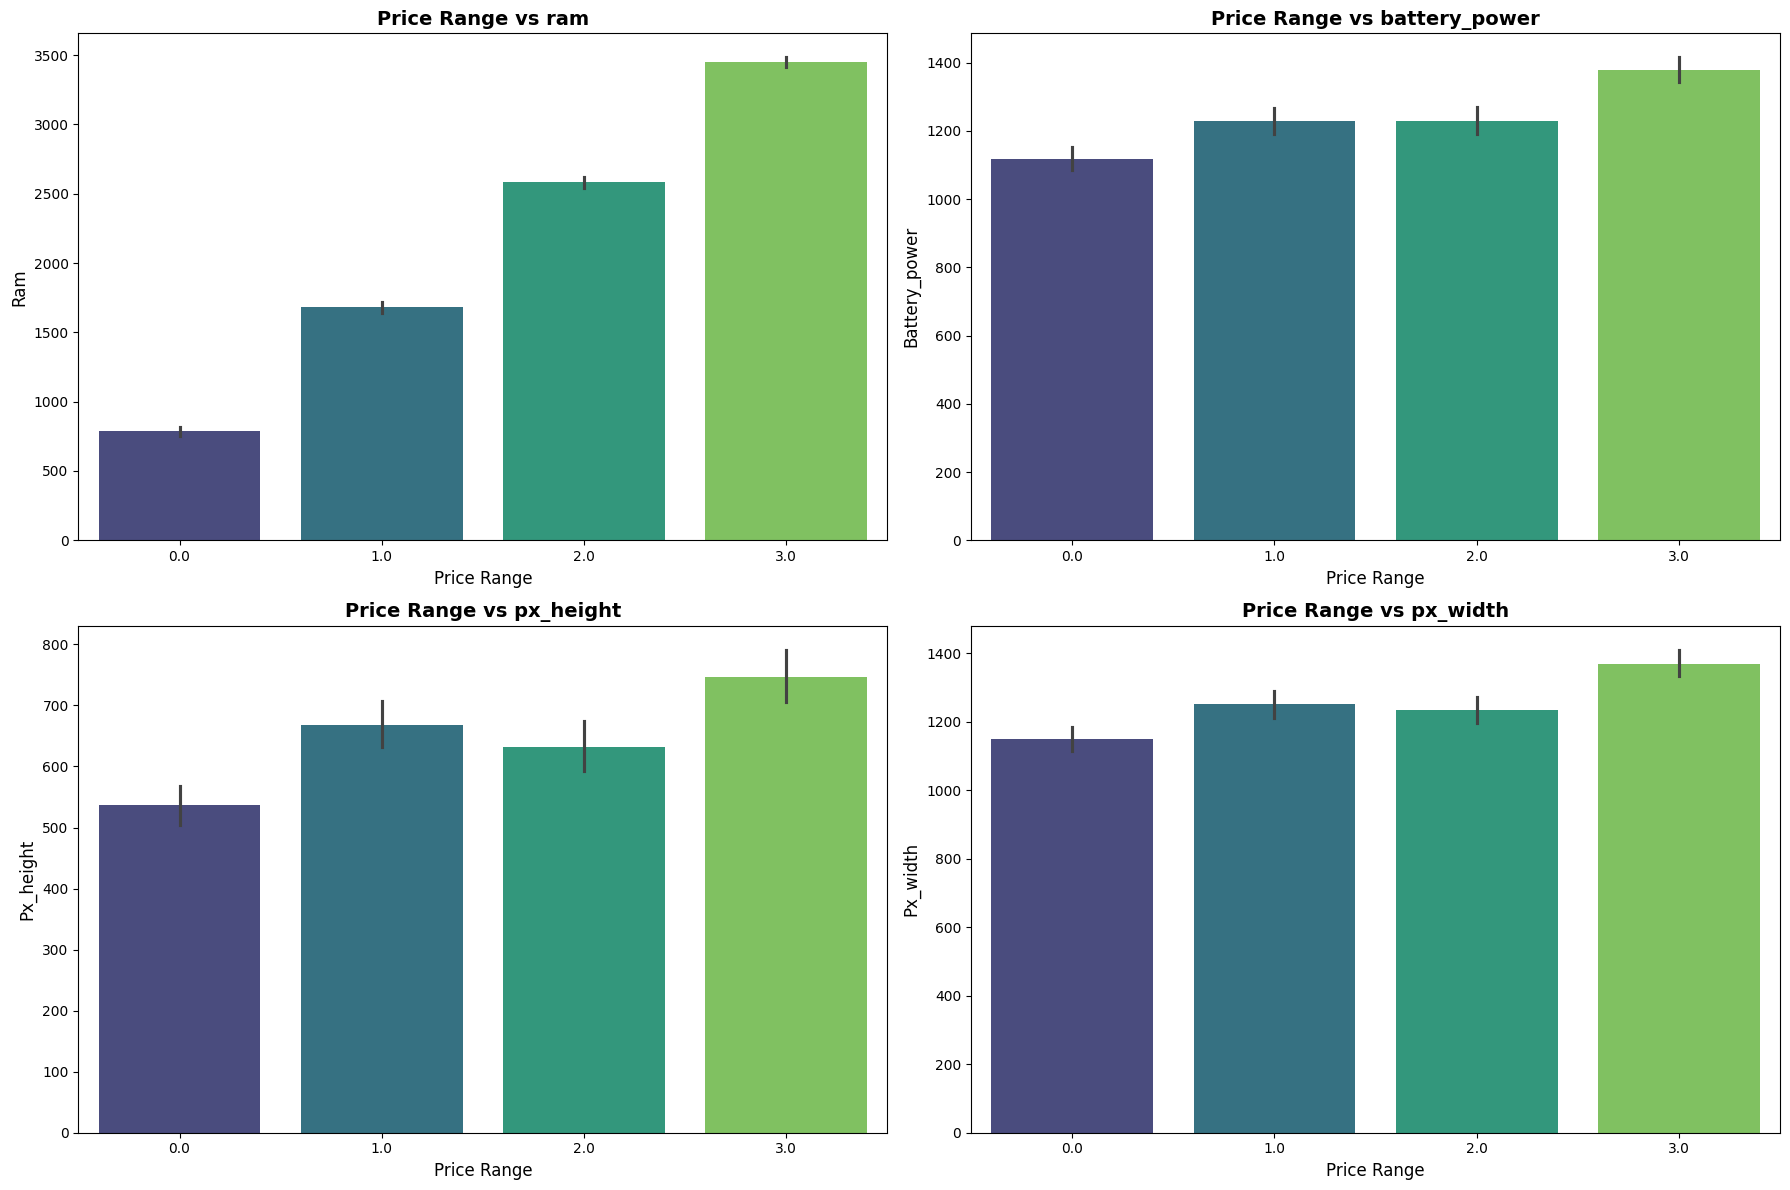

In [26]:
# Defining the variables to plot against 'price_range'
variables = ['ram', 'battery_power', 'px_height', 'px_width']
plt.figure(figsize=(18, 12))

## Loop through each variable and create a bar plot
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)  # Create subplots in a 2x2 grid
    sns.barplot(x='price_range', y=var, data=train_df, palette='viridis')
    plt.title(f'Price Range vs {var}', fontsize=14, fontweight='bold')
    plt.xlabel('Price Range', fontsize=12)
    plt.ylabel(var.capitalize(), fontsize=12)

plt.tight_layout()
plt.show()

#### **Observations:**
* ***Mobiles having RAM more than 3000MB falls under Very high cost category.As RAM increases price range also increases.***
* ***Mobiles having RAM less than 1000 MB falls under low cost category.***
* ***Mobiles with battery power more than 1300 mAh has very high cost. And Mobiles with battery power between 1200 and 1300 mAH falls under medium and high cost category.***
* ***Mobiles with more than 700 pixel height and width more than 1300 has very high cost.***

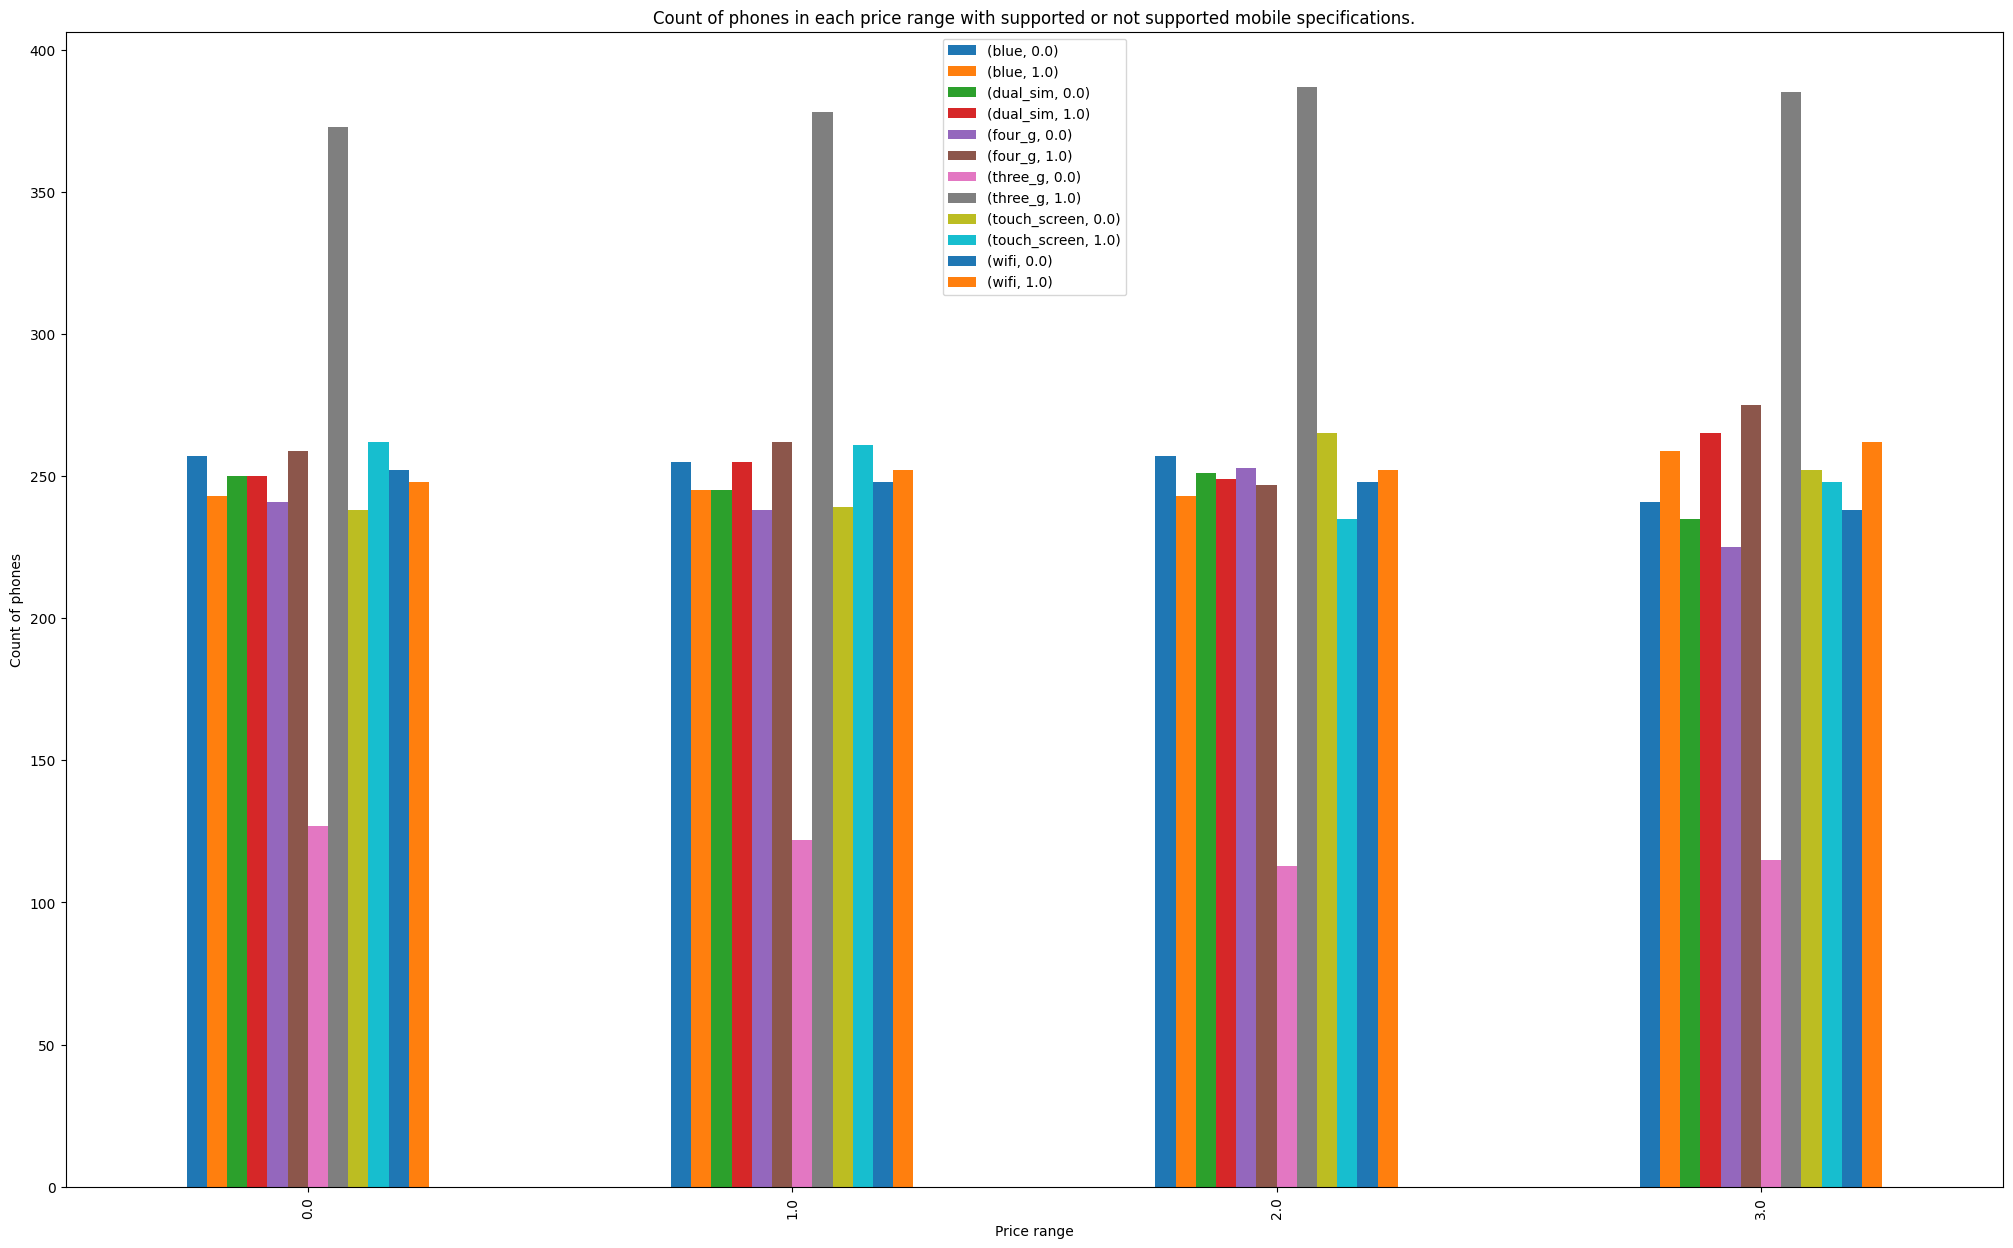

In [27]:
# Checking the counts of binary categorical variables by grouping price range.
grup_by_price = train_df.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts',
                                                        'four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts',
                                                        'wifi':'value_counts'}).unstack()
# visualising by plotting barchat.
grup_by_price.plot.bar(figsize=(25,15))
plt.title('Count of phones in each price range with supported or not supported mobile specifications.')
plt.xlabel('Price range')
plt.ylabel('Count of phones')
plt.legend(loc='upper center')
plt.show()

#### **Observations**
 
***We can see that each price range category has equal number of mobiles phones having both supporting and non supporting specifications.***

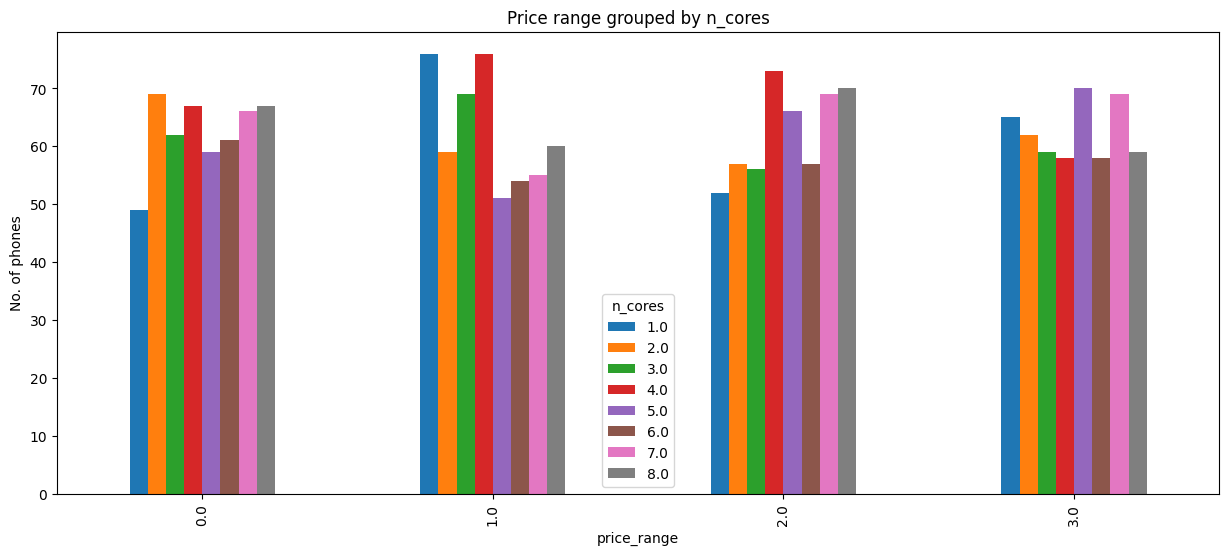

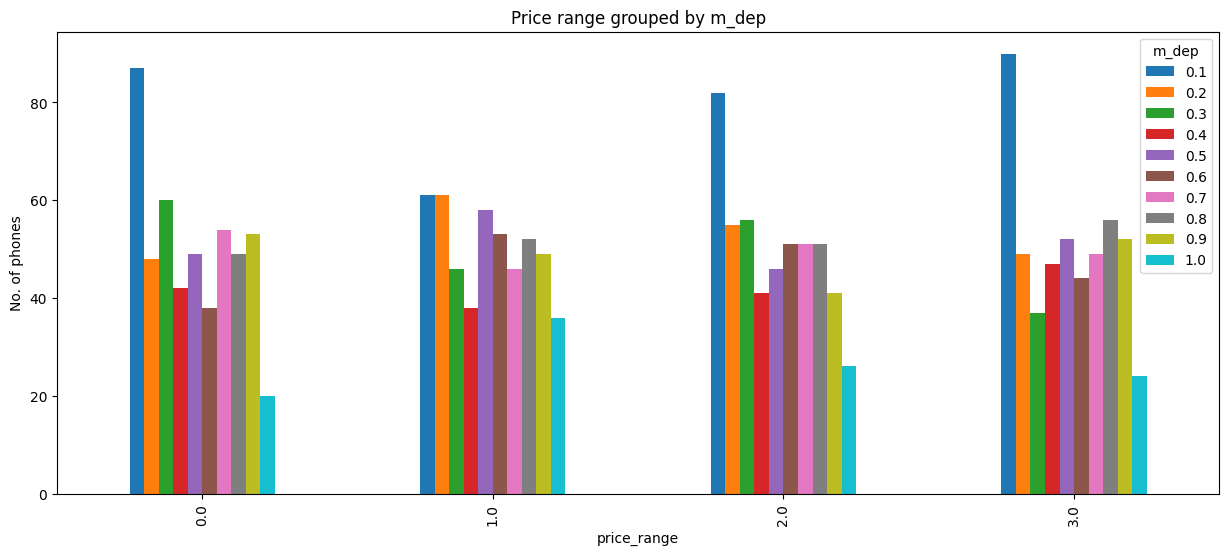

In [28]:
# Plotting bar chart for distribution of phone features (n_cores and m_dep) across different price ranges
list_2=['n_cores','m_dep']
for item in list_2:
  train_df.groupby(['price_range'])[item].value_counts().unstack().plot.bar(figsize=(15,6))
  plt.title(f'Price range grouped by {item}')
  plt.ylabel('No. of phones')

#### **Observation** 
* ***There are very few mobiles in price range 0 and 1 with lesser no of cores.***
* ***Most of the mobiles in price range 2 and 3 are with high no of cores.***

* ***Number of phones with less thickness is high and count of phones with high thickness is low.***

#### *Let's Check which numerical feature is driving the price range most.*

In [29]:
train_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

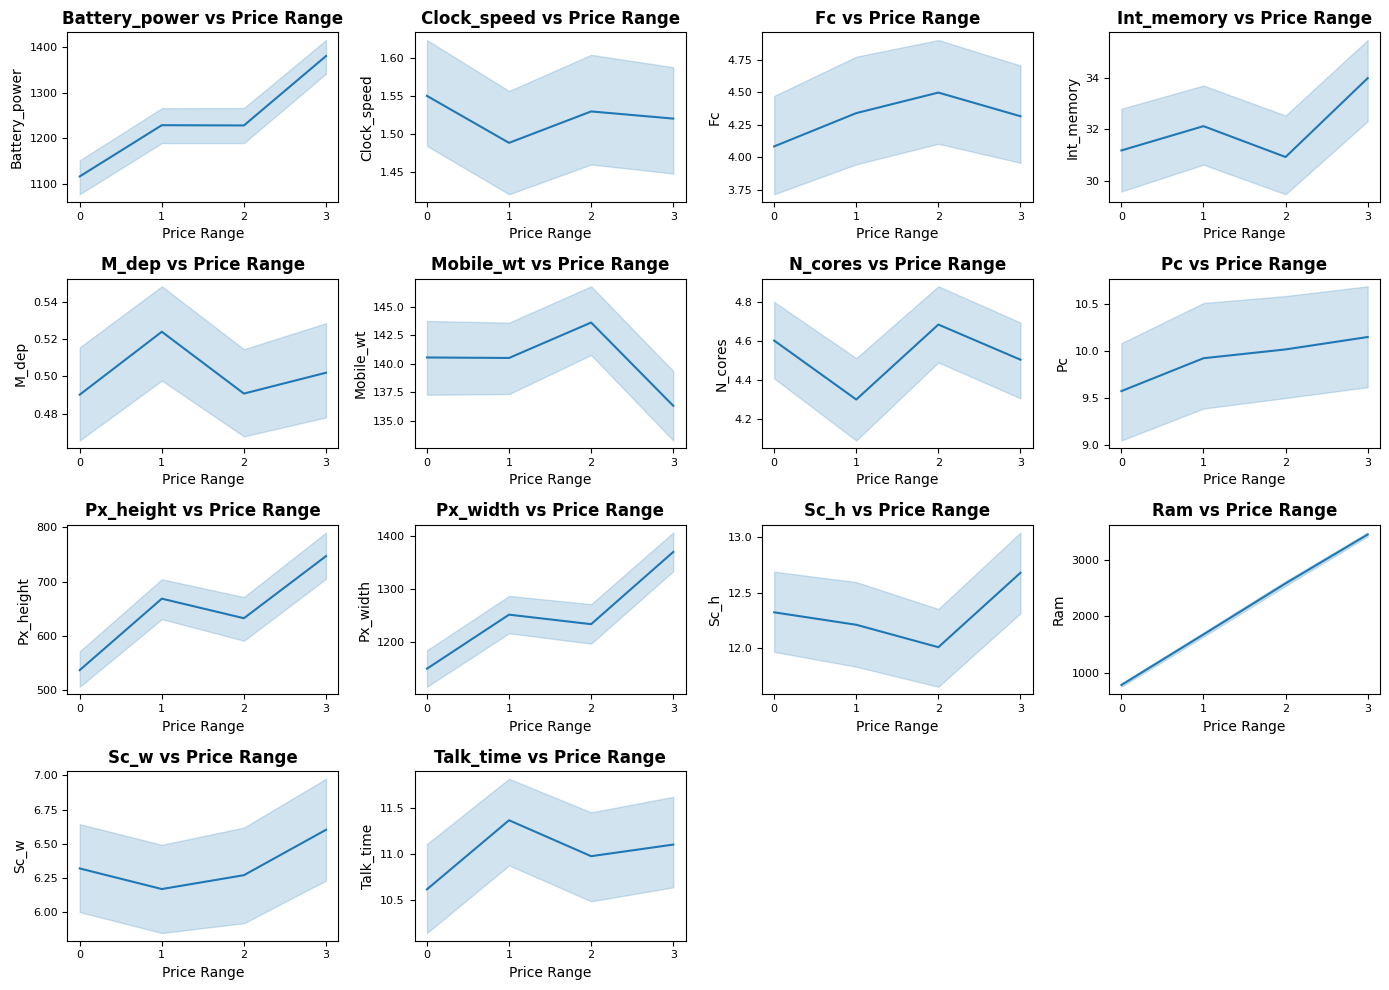

In [30]:
# List of numerical features to plot against 'price_range'
list_1 = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt',
          'n_cores', 'pc', 'px_height', 'px_width', 'sc_h', 'ram', 'sc_w', 'talk_time']

plt.figure(figsize=(14, 10))

## Loop through each feature and create line plots
for i, var in enumerate(list_1, 1):
    plt.subplot(4, 4, i)  # Create subplots in a 4x4 grid
    sns.lineplot(x='price_range', y=var, data=train_df)
    plt.title(f'{var.capitalize()} vs Price Range', fontsize=12, fontweight='bold')
    plt.xlabel('Price Range', fontsize=10)
    plt.ylabel(var.capitalize(), fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

#### **Observations**
* ***For class 1 and class2 battery power range is almost similar. As battery power increases price also increases whcih is quite obivious.***
* ***Mobiles in very high price range(Class 3) has less weight compared to other classes.That means as weight of mobiles decrease price increases.***
* ***Mobiles having max screen  height and width falls in very high price category. We can see in linechart of sc_width and sc_height from class 2 screen width and hieght starts increasing with price. Similar case is with px_height and px_width. As resolution of screen increases the price also increases***
***RAM has clear relationship with price range we saw that in correlation matrix also.***

#### *Let's Check the distribution of numerical columns and Outliers.*

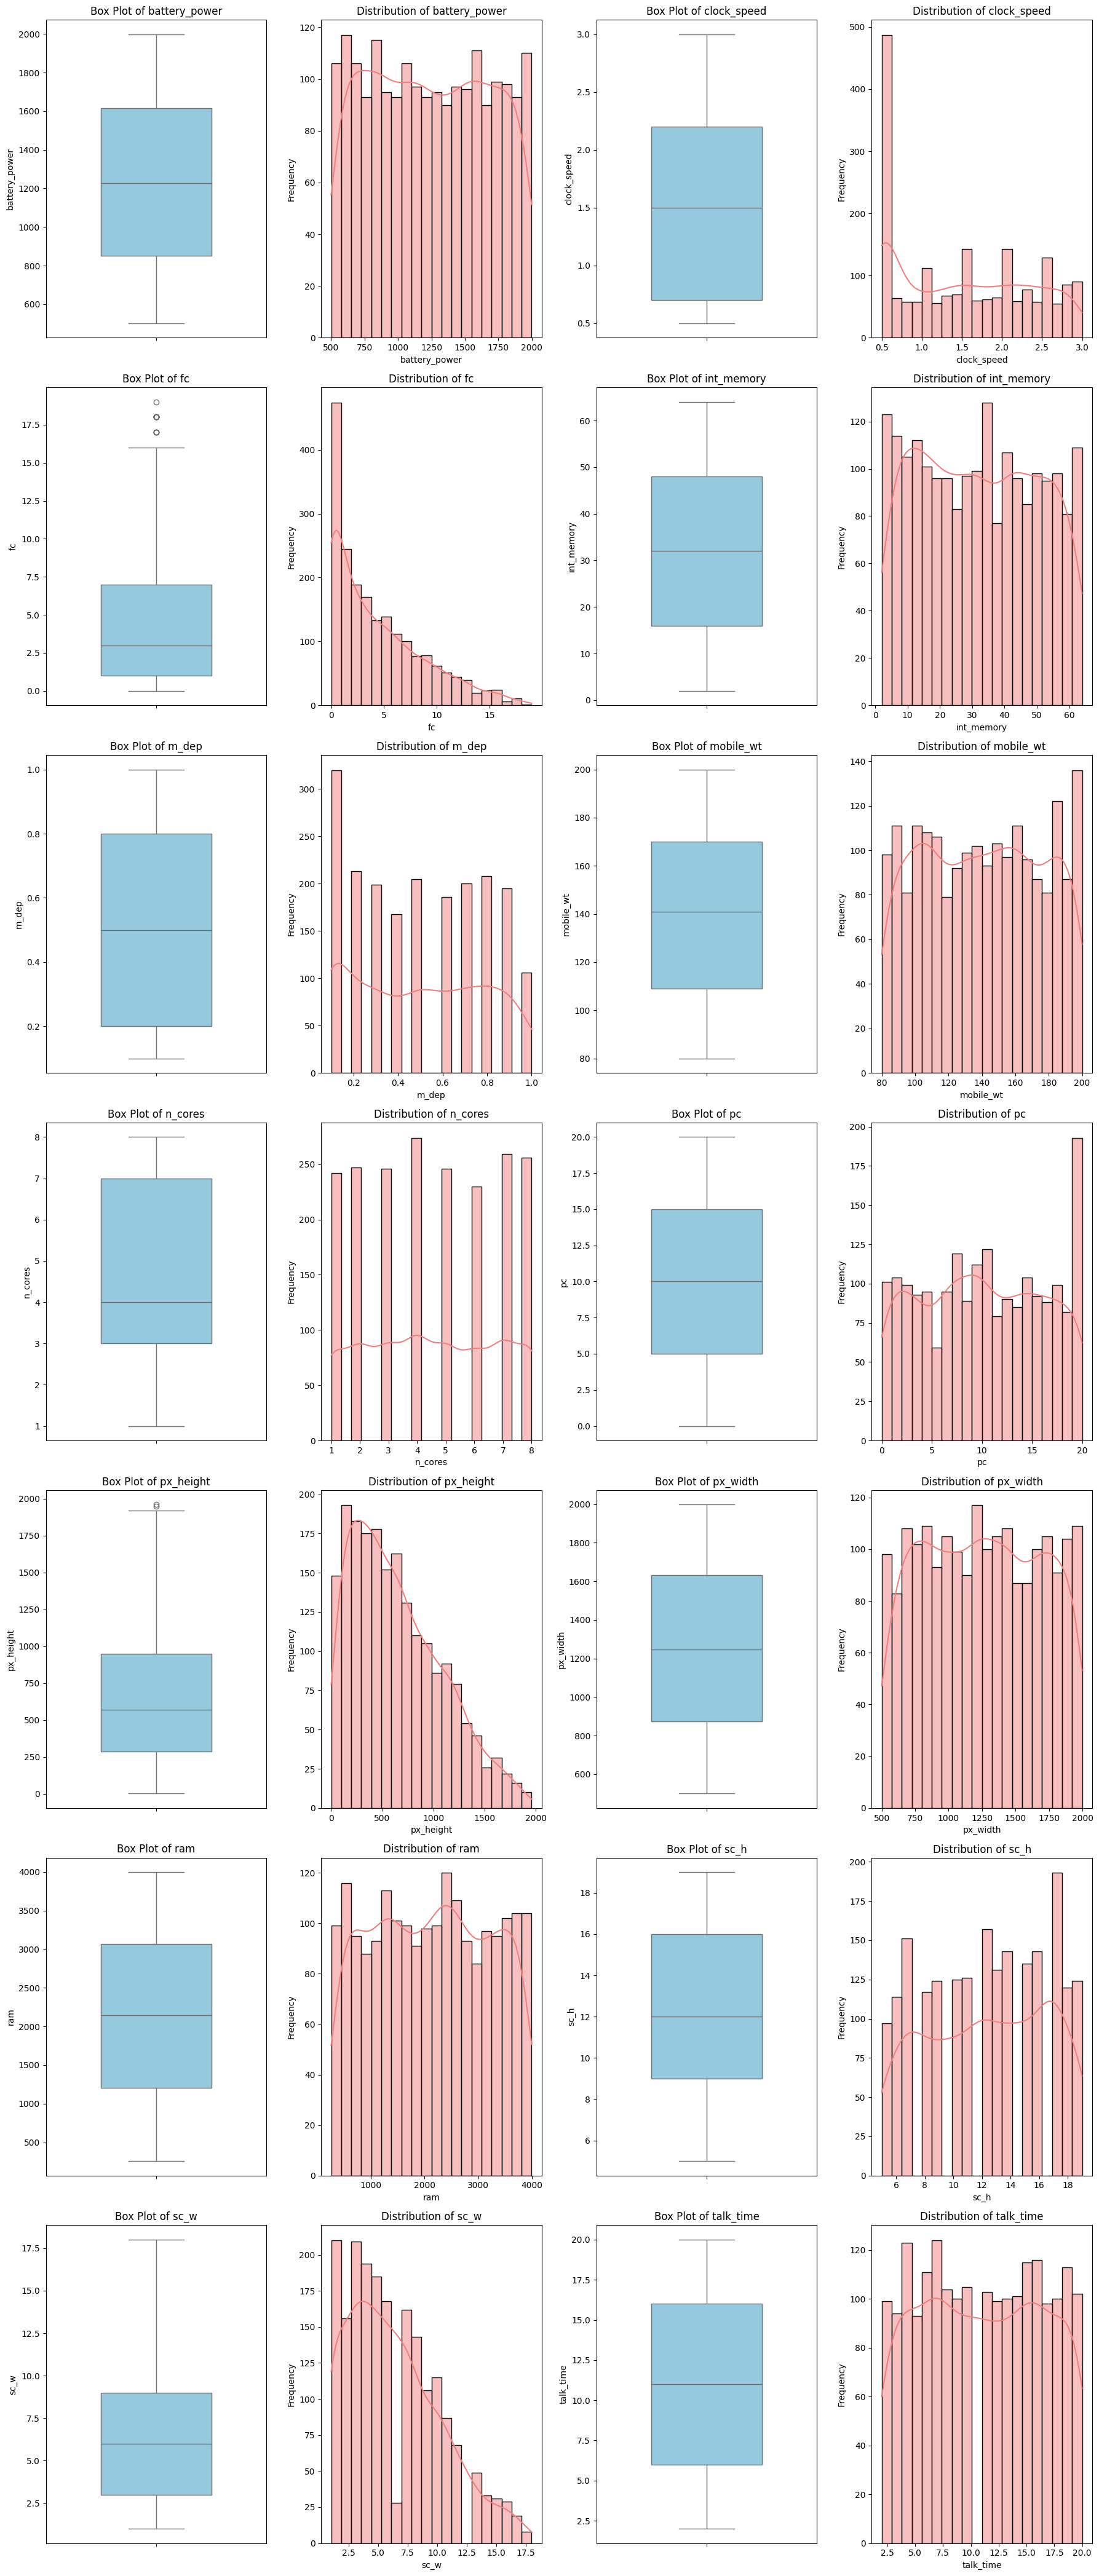

In [31]:
import math

# List of numeric columns to plot
numeric_col = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt',
               'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Calculating the number of rows and columns for subplots
num_cols = 2
num_vars = len(numeric_col)
num_rows = math.ceil(num_vars / num_cols)

plt.figure(figsize=(18, 6 * num_rows))

# Loop through each numeric column and create subplots
for i, var in enumerate(numeric_col, 1):
    row = (i - 1) // num_cols + 1
    col = (i - 1) % num_cols + 1
    
    plt.subplot(num_rows, num_cols * 2, 2 * (i - 1) + 1)  # Create box plot subplot
    sns.boxplot(y=train_df[var], color='skyblue', width=0.5)
    plt.title(f'Box Plot of {var}', fontsize=12)
    plt.ylabel(var, fontsize=10)
    
    plt.subplot(num_rows, num_cols * 2, 2 * (i - 1) + 2)  # Create distribution plot subplot
    sns.histplot(train_df[var], kde=True, color='lightcoral', bins=20)
    plt.title(f'Distribution of {var}', fontsize=12)
    plt.xlabel(var, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

- Data is well distrubted.
- fc and px_height has some outliers.

#### *Outlier Treatment.*

In [32]:
# Identify and remove outliers in the 'fc' column based on the interquartile range (IQR)
Q1 = train_df["fc"].quantile(0.25)
Q3 = train_df['fc'].quantile(0.991)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will take datapoints before Q3.
train_df = train_df[(train_df['fc'] <= Q3)]

In [33]:
# Identify and remove outliers in the 'px_height' column based on the interquartile range (IQR)
Q1 = train_df["px_height"].quantile(0.25)
Q3 = train_df['px_height'].quantile(0.991)
IQR = Q3-Q1
# Outliers are present after Quartile 3. so we will take datapoints before Q3.
train_df = train_df[(train_df['px_height'] <= Q3)]

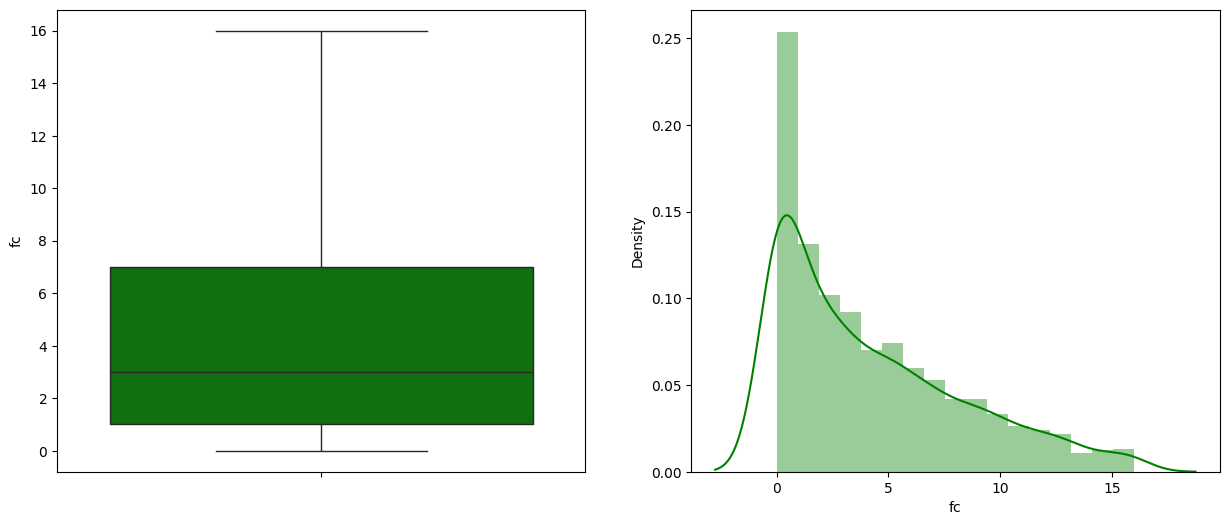

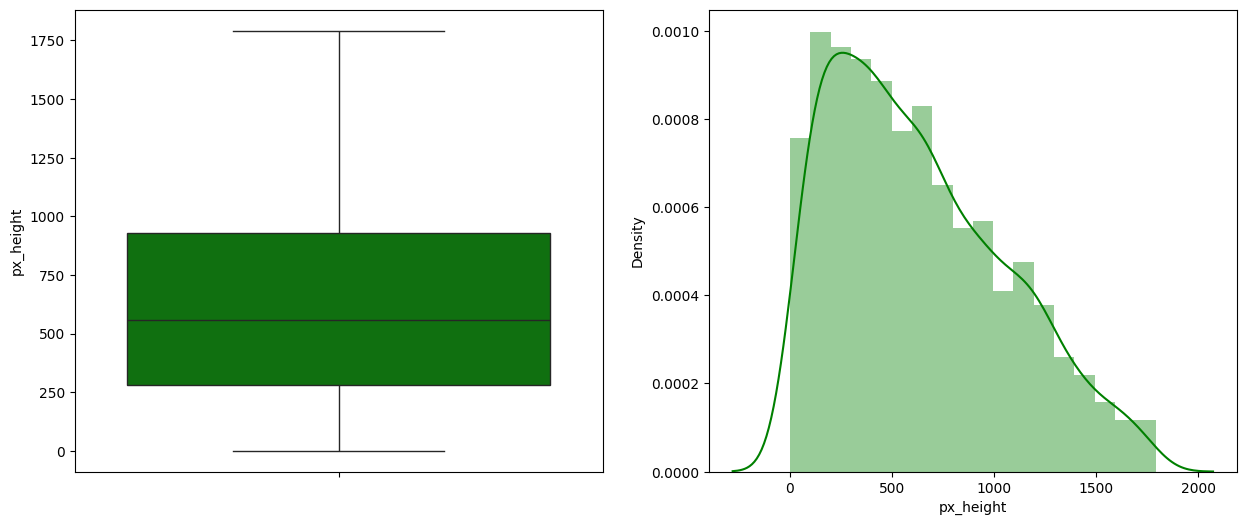

In [34]:
# Visualising whether oultliers are removed or not.
for var in ['fc','px_height']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=train_df[var],color='green')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(train_df[var],color='green')
    
    fig.set_xlabel(var)
    plt.show()

## **Feature Selection**

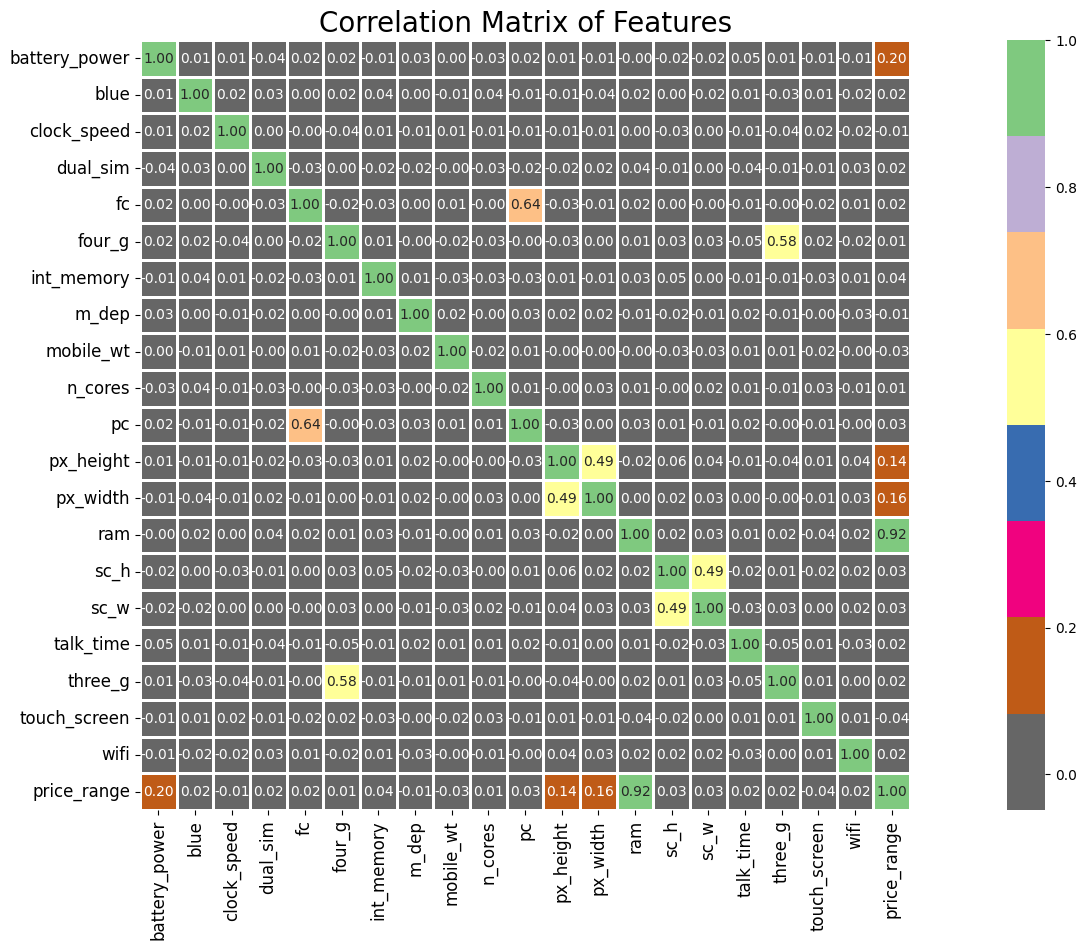

In [35]:
# Calculating correlation matrix
corr = train_df.corr()
plt.figure(figsize=(25, 10))

sns.heatmap(corr, annot=True, cmap=plt.cm.Accent_r, fmt='.2f', 
            linewidths=1, linecolor='white', cbar=True, square=True)
plt.title('Correlation Matrix of Features', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [36]:
# Separating X variables (independent features) and Y variable (dependent target)
X = train_df.drop('price_range', axis=1)
y = train_df["price_range"]

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Initialize SelectKBest with chi-squared score function and select top 12 important features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X, y)

# Create dataframe for feature scores and columns
dfscores = pd.DataFrame(fit.scores_)  # Scores of each feature
dfcolumns = pd.DataFrame(X.columns)  # Names of each feature

# Concatenate feature names and scores into a single dataframe
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # Assign column names

# Display the dataframe showing feature names and their scores
print("Top 12 Important Features:")
print(featureScores.nlargest(12, 'Score'))

Top 12 Important Features:
            Specs          Score
13            ram  915771.566479
11      px_height   15757.421116
0   battery_power   13399.493422
12       px_width    9299.682574
8       mobile_wt      89.225442
6      int_memory      79.335880
14           sc_h      11.939828
16      talk_time      11.272551
4              fc      10.807547
15           sc_w       9.752024
9         n_cores       8.051487
10             pc       7.681300


In [38]:
# Selecting 12 features with the highest chi-squared statistic as independent variables (X)
X = train_df[['ram', 'px_height', 'battery_power', 'px_width', 'mobile_wt', 
              'int_memory', 'sc_h', 'talk_time', 'sc_w', 'fc', 'n_cores', 'pc']]

# Defining the target variable (dependent variable, y)
y = train_df['price_range']

## **Predictive Modeling**
Predictive modeling is a process of using statistical and machine learning techniques to analyze data and build models that can be used to predict future outcomes or behavior. It involves identifying patterns and relationships in historical data and using this information to develop models that can be used to predict future events or behaviors with a high degree of accuracy.
Algorithms used for predictive modeling:
* 1) Decision Tree
* 2) Random Forest classifier
* 3) Gradient Boosting Classifier
* 4) K-nearest Neighbour classifier
* 5) XG Boost Classifier 
* 6) Support Vector Machine(SVM)


- **As Decision tree,random forest and enssembles trees do not require Feature scaling as these are Tree based models. So we will be using X_train and X_test which are not scaled.**
- **For K nearest Neighbors and SVM  we will be usingseX_train_scaled and X_test_scaled. That is we we will use Standardised data. i.e. Scaled data.
As these are distance based Algorithms.**

In [39]:
""" 
    importing all essential libraries 
                                        """
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [40]:
# Splitting the data into Train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (1473, 12)
Shape of X_test:  (491, 12)
Shape of y_train:  (1473,)
Shape of y_test:  (491,)


In [41]:
# Creating an object of MinMax Scaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)  

In [42]:
X_train_scaled

array([[-0.91019637, -1.02481124,  0.98689616, ..., -0.5184728 ,
        -1.13655149,  0.52381817],
       [ 0.04710232, -1.29340152, -1.53141326, ...,  0.45720326,
        -0.6941254 ,  0.35706128],
       [-1.50656139,  0.7689047 ,  0.46121873, ..., -0.27455378,
        -1.13655149, -0.81023702],
       ...,
       [-0.78561013,  0.70817994,  1.69453887, ..., -1.00631082,
         0.1907268 , -0.97699391],
       [ 0.99890455, -1.35879742,  0.86558599, ...,  1.1889603 ,
         0.63315289,  1.02408887],
       [ 0.17993323, -0.20736257,  0.7307969 , ..., -0.27455378,
         0.63315289, -0.64348012]])

In [43]:
X_test_scaled

array([[-0.25703468,  0.05655657, -0.24867046, ...,  1.67679832,
         0.1907268 ,  1.35760267],
       [-0.55201093,  2.31738604,  0.4499863 , ..., -1.00631082,
         0.1907268 , -1.14375081],
       [-1.09890789, -1.16728087,  0.81391684, ..., -0.5184728 ,
         1.51800509, -0.81023702],
       ...,
       [-0.24054533,  0.91838103, -1.20118   , ..., -1.00631082,
        -1.13655149, -1.64402151],
       [-0.6830097 , -0.1116043 ,  1.23850246, ...,  1.67679832,
         0.1907268 ,  0.52381817],
       [ 1.65847877, -0.56236885, -1.58982187, ..., -1.00631082,
         0.1907268 , -1.47726461]])

In [44]:
# Creating function to get accuracy of the models in dataframe
def evaluate_models(models, model_names, X_train, X_test, y_train, y_test):
    results = []
    
    for model, model_name in zip(models, model_names):
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_pred = model.predict(X_test)
        
        accuracy_train = accuracy_score(y_train, y_train_pred)
        accuracy_test = accuracy_score(y_test, y_pred)

        results.append({
            "Model": model_name,
            "Train Accuracy": f"{accuracy_train*100:.2f}%",
            "Test Accuracy": f"{accuracy_test*100:.2f}%",
        })

    results_df = pd.DataFrame(results)
    return results_df

In [45]:
# Defining models and model names
models = [
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=42, n_estimators=100, min_samples_split=10,
                           min_samples_leaf=1, max_features='sqrt', max_depth=30, bootstrap=True),
    GradientBoostingClassifier(random_state=0),
    KNeighborsClassifier(),
    XGBClassifier(),
    SVC(random_state=101)
]

model_names = [
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "Gradient Boosting Classifier",
    "K-Neighbors Classifier",
    "XGBClassifier",
    "SVC"
]

# Call the function to evaluate and store the metrics in a DataFrame
results_df = evaluate_models(models, model_names, X_train, X_test, y_train, y_test)
results_df

,Model,Train Accuracy,Test Accuracy
0,Decision Tree Classifier,100.00%,81.26%
1,Random Forest Classifier,99.93%,87.17%
2,Gradient Boosting Classifier,99.93%,89.41%
3,K-Neighbors Classifier,95.38%,91.45%
4,XGBClassifier,100.00%,89.82%
5,SVC,95.72%,95.11%


#### *Here we can see most of the models are overfitted into the dataset*

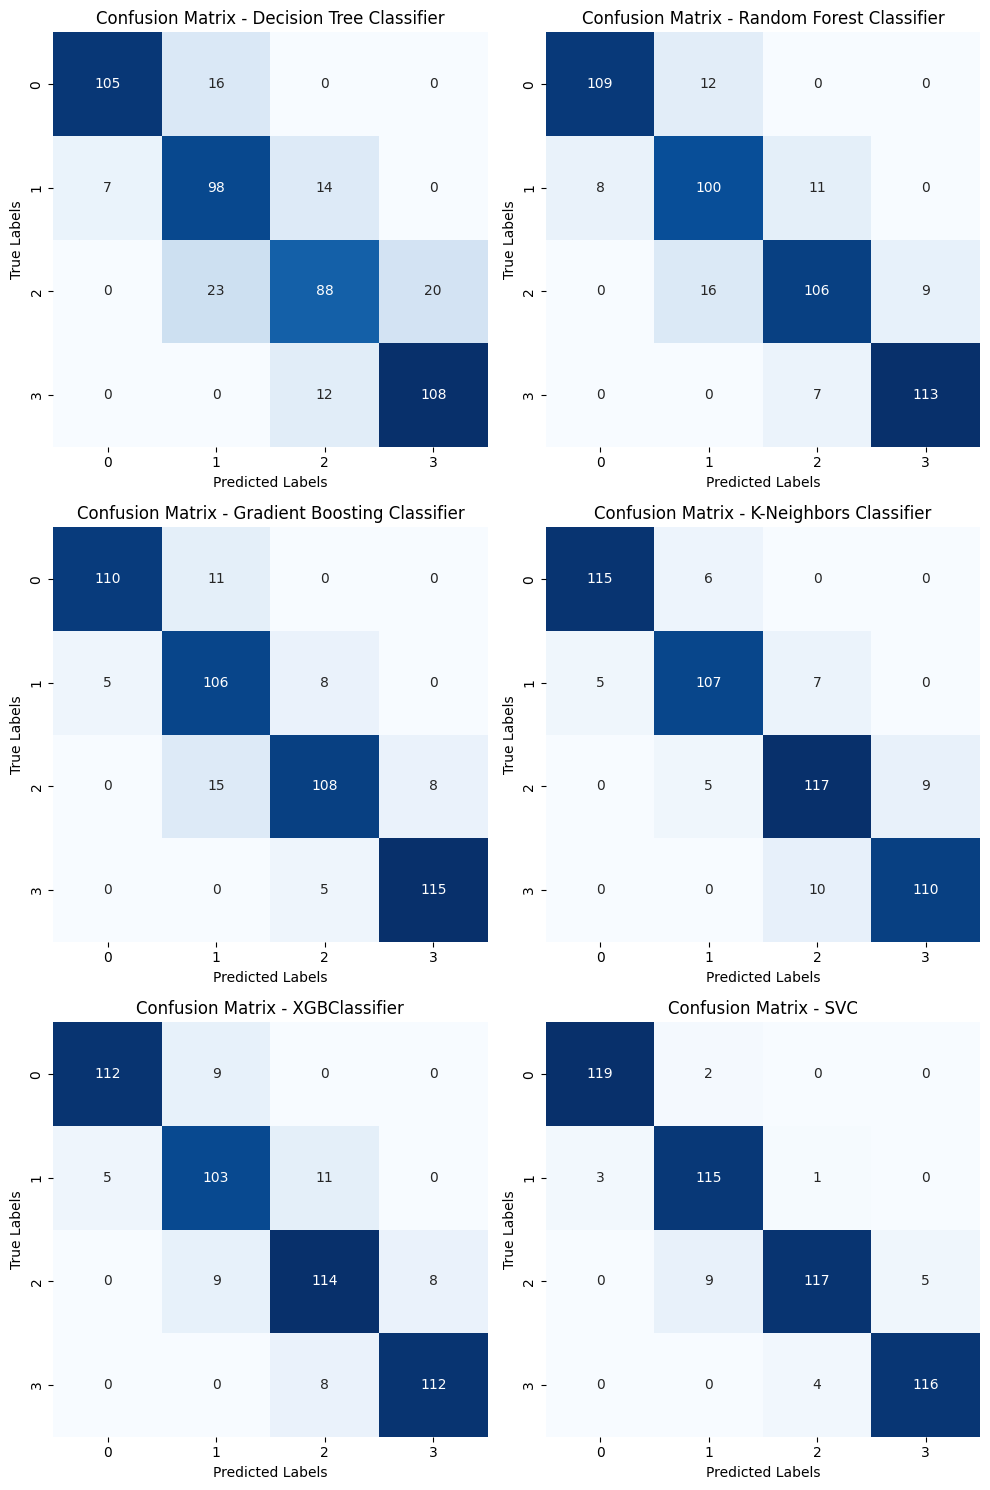

In [46]:
# Creating subplots for confusion matrices
num_models = len(models)
num_cols = 2  # Number of columns for subplots
num_rows = (num_models + num_cols - 1) // num_cols  # Calculate number of rows needed

plt.figure(figsize=(10, 5 * num_rows))

for i, (model, model_name) in enumerate(zip(models, model_names), start=1):
    # Train model and predict on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix in subplot
    plt.subplot(num_rows, num_cols, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

In [47]:
# Initialize an empty list to store results
results = []

# Iterate over each model
for model, model_name in zip(models, model_names):
    # Train model on the training set
    model.fit(X_train, y_train)
    
    # Generate classification report for training set
    train_report = classification_report(y_train, model.predict(X_train), output_dict=True)
    
    # Generate classification report for test set
    test_report = classification_report(y_test, model.predict(X_test), output_dict=True)
    
    # Append results as a dictionary to the list
    results.append({
        'Model': model_name,
        'Classification of Train Set': train_report,
        'Classification of Test Set': test_report
    })

# Create DataFrame from the list of dictionaries
results_df = pd.DataFrame(results)
results_df.to_json('classification_reports.json', orient='records')
results_df

,Model,Classification of Train Set,Classification of Test Set
0,Decision Tree Classifier,"{'0.0': {'precision': 1.0, 'recall': 1.0, 'f1-...","{'0.0': {'precision': 0.9375, 'recall': 0.8677..."
1,Random Forest Classifier,"{'0.0': {'precision': 1.0, 'recall': 1.0, 'f1-...","{'0.0': {'precision': 0.9316239316239316, 'rec..."
2,Gradient Boosting Classifier,"{'0.0': {'precision': 1.0, 'recall': 1.0, 'f1-...","{'0.0': {'precision': 0.9565217391304348, 'rec..."
3,K-Neighbors Classifier,"{'0.0': {'precision': 0.9918256130790191, 'rec...","{'0.0': {'precision': 0.9583333333333334, 'rec..."
4,XGBClassifier,"{'0.0': {'precision': 1.0, 'recall': 1.0, 'f1-...","{'0.0': {'precision': 0.9572649572649573, 'rec..."
5,SVC,"{'0.0': {'precision': 0.9864864864864865, 'rec...","{'0.0': {'precision': 0.9754098360655737, 'rec..."


#### *To avoid overfitting issue, lets chnage some tunning into the models.*

### **Let's tune some hypereparameters of the models**

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def tune_and_evaluate_model(model, param_grid, X_train, X_test, y_train, y_test):
    # Initialize GridSearchCV with the specified model, parameter grid, and scoring metric
    model_tune = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=3)
    
    # Fitting GridSearchCV to the training data
    model_tune.fit(X_train, y_train)
    
    # Get the best parameters and best estimator from the tuned model
    best_params = model_tune.best_params_
    best_estimator = model_tune.best_estimator_
    
    # Train the optimal model with the best parameters on the training data
    optimal_model = best_estimator.fit(X_train, y_train)
    
    # Predictions on the training and test sets using the optimal model
    y_train_pred = optimal_model.predict(X_train)
    y_pred = optimal_model.predict(X_test)
    
    # Calculate accuracy scores for training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Return a dictionary containing model evaluation results
    results = {
        'Train Accuracy': f"{train_accuracy*100:.2f}%",
        'Test Accuracy': f"{test_accuracy*100:.2f}%",
        'Best Estimator': optimal_model
    }
    
    return results

In [49]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Define a list of classifiers along with their respective parameter grids
classifiers = [
    (DecisionTreeClassifier(random_state=0), {
        'criterion': ['gini', 'entropy'],
        'max_depth': [2, 4, 6, 8, 10],
        'splitter': ['best', 'random'],
        'min_samples_split': [3, 5, 8],
        'max_features': ['auto', 'sqrt']
    }),
    (RandomForestClassifier(random_state=0), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 3],
        'max_features': ['auto', 'log2']
    }),
    (GradientBoostingClassifier(random_state=0), {
        'learning_rate': [0.005, 0.1, 0.5],
        'min_samples_split': list(range(10, 21))
    }),
    (KNeighborsClassifier(), {
        'n_neighbors': list(range(1, 21))
    }),
    (XGBClassifier(), {
        'learning_rate': [0.1, 0.3],
        'n_estimators': [100, 200],
        'gamma': [0.1, 0.3],
        'subsample': [0.5, 0.7]
    }),
    (SVC(), {
        'C':[0.01,0.1,1,10],
        'kernel' : ["linear","poly","rbf","sigmoid"],
        'degree' : [1,3,5,7],
        'gamma' : [0.01,1]
    }),
]

In [50]:
# Initialize an empty list to store results
results = []

# Iterate over each classifier and its corresponding parameter grid
for classifier, param_grid in classifiers:
    # Call the function to tune and evaluate the classifier
    classifier_results = tune_and_evaluate_model(classifier, param_grid, X_train, X_test, y_train, y_test)
    
    # Append the evaluation results to the list
    results.append({
        'Classifier': type(classifier).__name__,
        **classifier_results
    })

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results)
results_df

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, ma

,Classifier,Best Parameters,Train Accuracy,Test Accuracy,Best Estimator
0,DecisionTreeClassifier,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.892736,0.700611,"DecisionTreeClassifier(criterion='entropy', ma..."
1,RandomForestClassifier,"{'max_depth': None, 'max_features': 'log2', 'm...",1.000000,0.887984,"(DecisionTreeClassifier(max_features='log2', r..."
2,GradientBoostingClassifier,"{'learning_rate': 0.5, 'min_samples_split': 15}",1.000000,0.904277,([DecisionTreeRegressor(criterion='friedman_ms...
3,KNeighborsClassifier,{'n_neighbors': 7},0.949084,0.928717,KNeighborsClassifier(n_neighbors=7)
4,XGBClassifier,"{'gamma': 0.1, 'learning_rate': 0.1, 'n_estima...",1.000000,0.918534,"XGBClassifier(base_score=None, booster=None, c..."
5,SVC,"{'C': 0.01, 'degree': 1, 'gamma': 0.01, 'kerne...",0.977597,0.971487,"SVC(C=0.01, degree=1, gamma=0.01, kernel='poly')"


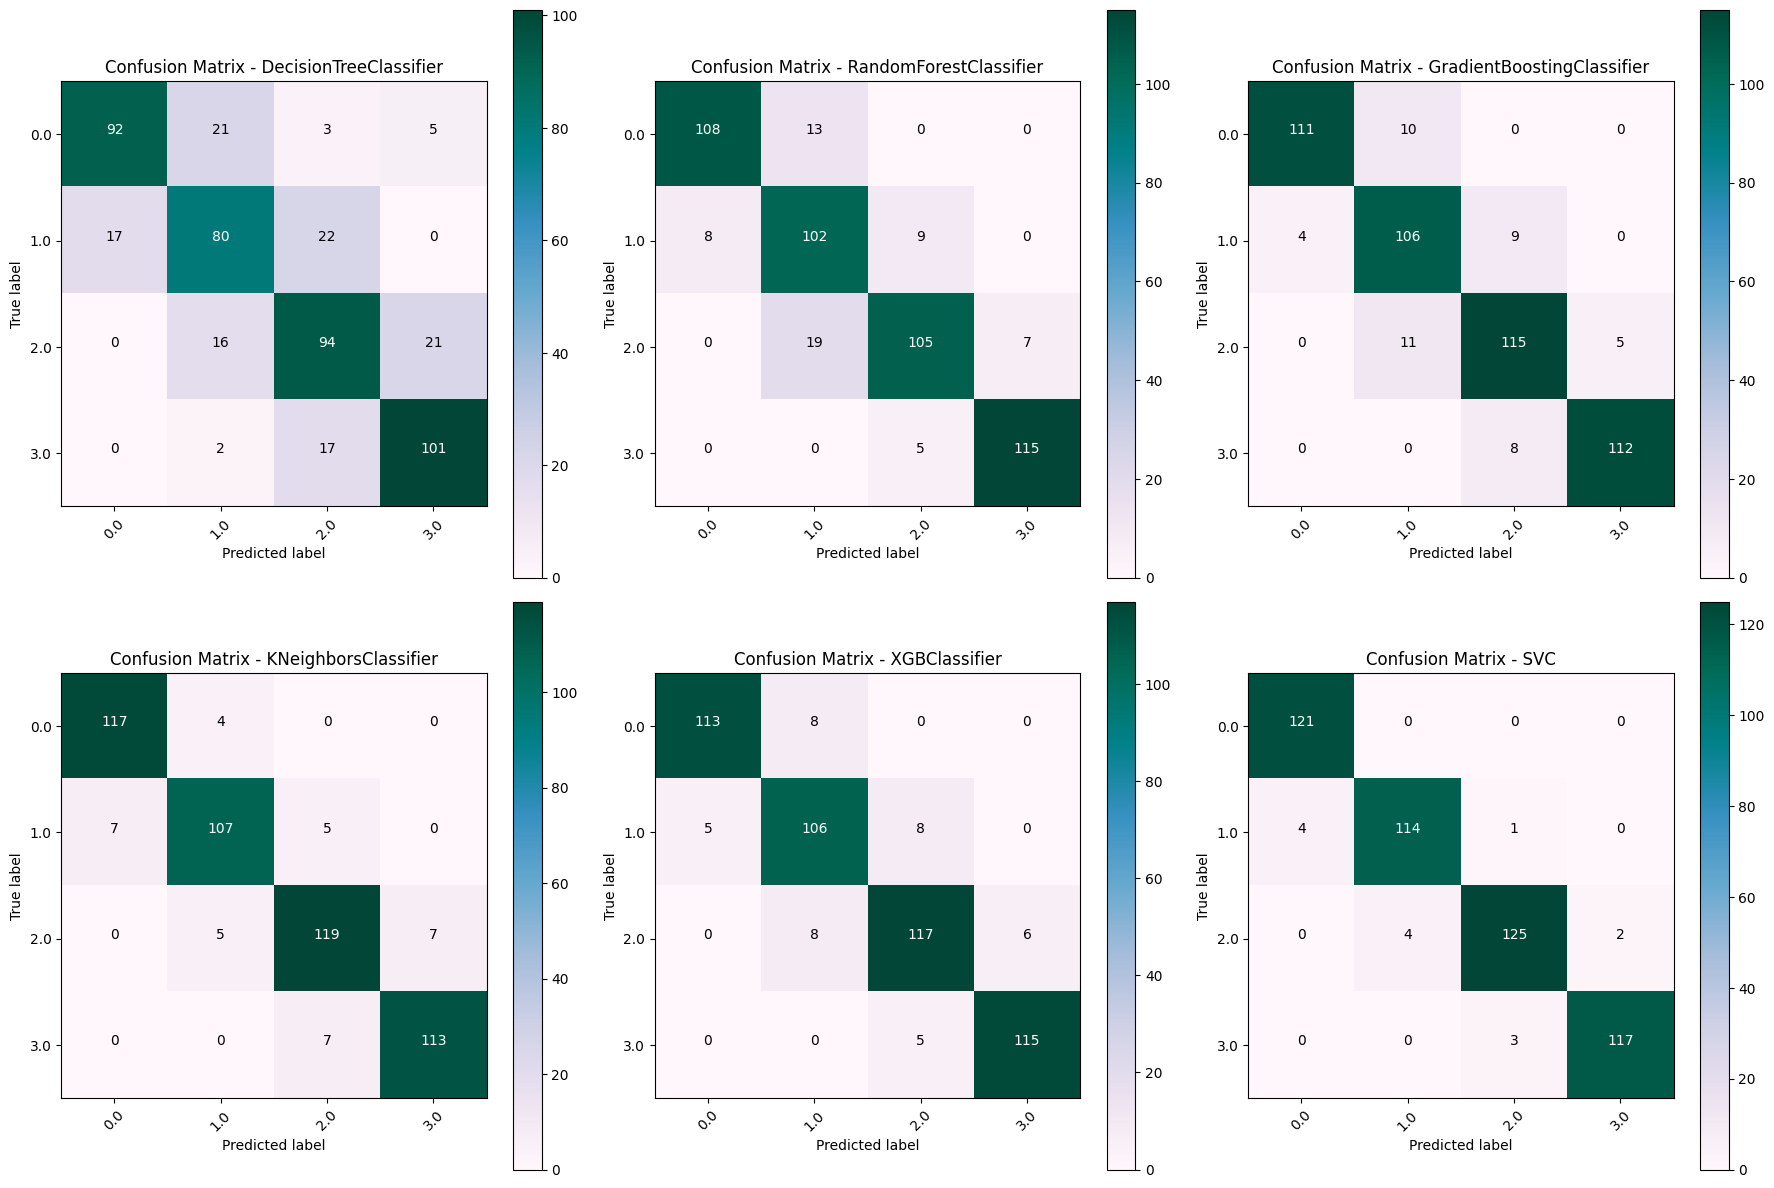

In [51]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(ax, cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.figure.colorbar(im, ax=ax, orientation='vertical')

# Custom color palette for confusion matrices
cmap = plt.cm.PuBuGn

# Create a figure and axis for subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Iterate over each classifier results to plot confusion matrix in subplots
for idx, row in results_df.iterrows():
    # Extract classifier name and best estimator
    classifier_name = row['Classifier']
    best_estimator = row['Best Parameters']

    # Initialize the classifier with best parameters
    classifier = None
    if classifier_name == 'DecisionTreeClassifier':
        classifier = DecisionTreeClassifier(**best_estimator)
    elif classifier_name == 'RandomForestClassifier':
        classifier = RandomForestClassifier(**best_estimator)
    elif classifier_name == 'GradientBoostingClassifier':
        classifier = GradientBoostingClassifier(**best_estimator)
    elif classifier_name == 'KNeighborsClassifier':
        classifier = KNeighborsClassifier(**best_estimator)
    elif classifier_name == 'XGBClassifier':
        classifier = XGBClassifier(**best_estimator)
    elif classifier_name == 'SVC':
        classifier = SVC(**best_estimator)

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Predict on the test data
    y_pred = classifier.predict(X_test)

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)

    # Calculate subplot indices
    r, c = divmod(idx, 3)

    # Plot confusion matrix in the corresponding subplot
    plot_confusion_matrix(axs[r, c], cnf_matrix, classes=np.unique(y_train),
                          title=f'Confusion Matrix - {classifier_name}', cmap=cmap)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### **Observations of Decision Tree Classifier:**
Before Hyperparameter Tuning:
* training accuarcy = 100%
* test accuarcy = 81.26%

Model is overfitted the data and does not generalised well. So we tuned the hyperparameters.

After Hyperparameter tuning:
* Training accuarcy= 89.27%
* Test accuarcy = 70.06%

However this will not be good model for us.


### **Observations of Random Forest:**
Before Hyperparameter Tuning:
* training accuarcy = 99.93%
* test accuarcy = 87.17%

Model is overfitted the data and does not generalised well. So we tuned the hyperparameters.

After Hyperparameter tuning:
* Training accuarcy= 100%
* Test accuarcy = 88.79%

We have slightly improved scores but the model is overfitting.


### **Observations of Gradient Boost Classifiers:**
Before Hyperparameter tunning:
* Train accuracy score= 99.93%.
* Test accuracy score= 89.41%

Model did not generalised well and overfitted the training data. so we tuned hyperparameters of model.

After Hyperparameter Tuning
* Train accuracy score= 100%
* Test accuarcy score= 90.42%

Thus we slightly improved the model performance.However the model is not best.


### **Observations of K-Nearest Neighbors:**
Before hyperparameters tuning:
* Train Accuracy: 95.38%
* Test Accuarcy: 91.45%

After Hyperparameter Tuning:
* Train Accuarcy: 94.90%
* Test Accuarcy: 92.87%

Surely we improved the model perfromance and reduced overfitting but however this is not good model for us.


### **Observations of XGBoost Classifier:**
Before Hyperparameter Tuning
* Train Accuarcy = 100.00%
* Test Accuarcy = 89.82%

Model is overfitted the data and does not generalised well. So we tuned the hyperparameters.

After Hyperparameter Tuning
* Train Accuarcy = 100.00%
* Test Accuarcy = 91.85%

we have improved the model performance by Hyperparamter tuning. Test accuracy is increased to 91.85%.But still the difference of accuracy score between train and test is more than 5%.


### **Observations of SVM:**
Before Hyperparameter Tuning
* Train Accuarcy = 95.72%
* Test Accuarcy = 95.11%

After Hyperparameter Tuning
* Train Accuarcy = 97.75%
* Test Accuarcy = 97.14%

SVM performed very well as compared to other alogorithms.
In terms of feature importance RAM,Battery power,px_height and px_weight are the imporatant features.
f1 score for individual classes is also very good.

### *Extracting best parameter from the SVC model*

In [52]:
# creating an object of classifier.
svm  = SVC()
# paramter grid values for hyperparameter tunning.
# parameter grid for GridSearchCv
grid_values = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

# Hyperparameter tuning with the GrdiSearhCV with cv=5
svm_cv = GridSearchCV(svm, grid_values, cv = 5,verbose =2)
svm_cv.fit(X_train_scaled,y_train)     # fitting the data into the model
# getting the best parameters
svm_cv.best_params_

# getting the best estimators
svm_cv.best_estimator_

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=0.01, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=1, gamma=0.

SVC(C=10, degree=1, gamma=0.01, kernel='linear')

In [53]:
# applying best parameters to the SVm model.
svm_optimal=SVC(C=10, degree=1, gamma=0.01, kernel='linear',probability=True)
svm_optimal.fit(X_train_scaled,y_train)

SVC(C=10, degree=1, gamma=0.01, kernel='linear', probability=True)

#### *Cross Checking whether the data is good for SVM or not by creating 4 dfs of each class. and plotting the scatterplot of most important feature "RAM" and  "Battery Power".*

In [54]:
# Create separate DataFrames for each price range class
df0 = train_df[train_df['price_range'] == 0]
df1 = train_df[train_df['price_range'] == 1]
df2 = train_df[train_df['price_range'] == 2]
df3 = train_df[train_df['price_range'] == 3]

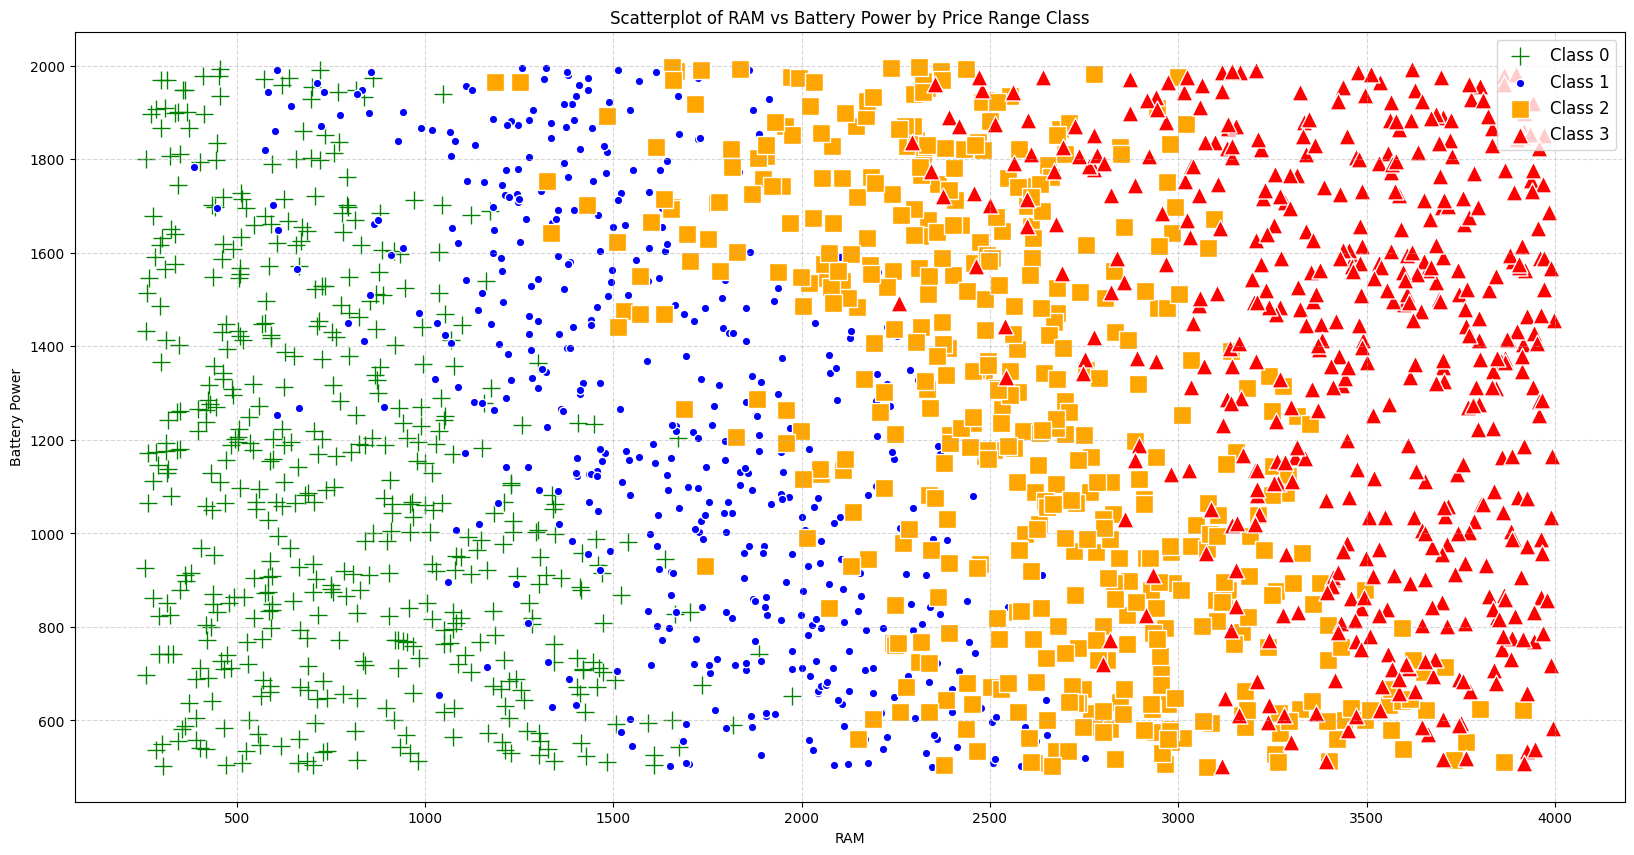

In [55]:
# Setting up the figure and axes for plotting
plt.figure(figsize=(20, 10))

# Plot scatterplot for class 0 (price_range = 0)
sns.scatterplot(x='ram', y='battery_power', data=df0, color='green', label='Class 0', marker='+', s=150)
# Plot scatterplot for class 1 (price_range = 1)
sns.scatterplot(x='ram', y='battery_power', data=df1, color='blue', label='Class 1', marker='.', s=150)
# Plot scatterplot for class 2 (price_range = 2)
sns.scatterplot(x='ram', y='battery_power', data=df2, color='orange', label='Class 2', marker='s', s=150)
# Plot scatterplot for class 3 (price_range = 3)
sns.scatterplot(x='ram', y='battery_power', data=df3, color='red', label='Class 3', marker='^', s=150)

# Set plot title and labels
plt.title('Scatterplot of RAM vs Battery Power by Price Range Class')
plt.xlabel('RAM')
plt.ylabel('Battery Power')
plt.legend(loc='upper right', fontsize='large')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [56]:
X_test

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_h,talk_time,sc_w,fc,n_cores,pc
18,1835.0,658.0,1131.0,878.0,101.0,49.0,19.0,16.0,13.0,11.0,5.0,18.0
795,1513.0,1626.0,1442.0,1668.0,145.0,56.0,11.0,7.0,8.0,0.0,5.0,3.0
352,916.0,134.0,1604.0,939.0,191.0,33.0,13.0,12.0,10.0,2.0,8.0,5.0
1292,1300.0,293.0,1365.0,970.0,125.0,31.0,14.0,13.0,7.0,0.0,4.0,0.0
592,1183.0,178.0,1263.0,1883.0,175.0,64.0,14.0,17.0,3.0,12.0,5.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1499,1921.0,356.0,1742.0,1407.0,176.0,43.0,9.0,3.0,2.0,5.0,3.0,7.0
312,3615.0,1285.0,894.0,1462.0,199.0,50.0,13.0,6.0,6.4,1.0,3.0,14.0
544,1853.0,1027.0,707.0,1508.0,194.0,16.0,17.0,12.0,14.0,0.0,2.0,0.0
1054,1370.0,586.0,1793.0,722.0,154.0,27.0,16.0,19.0,3.0,11.0,5.0,13.0


In [57]:
test_df = test_df[X_test.columns.tolist()]
test_df

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_h,talk_time,sc_w,fc,n_cores,pc
0,3476.0,226.0,1043.0,1412.0,193.0,5.0,12.0,2.0,7.0,14.0,3.0,16.0
1,3895.0,746.0,841.0,857.0,191.0,61.0,6.0,7.0,8.4,4.0,5.0,12.0
2,2396.0,1270.0,1807.0,1366.0,186.0,27.0,17.0,10.0,10.0,1.0,3.0,4.0
3,3893.0,295.0,1546.0,1752.0,96.0,25.0,10.0,7.0,9.4,18.0,8.0,20.0
4,1773.0,749.0,1434.0,810.0,108.0,49.0,15.0,7.0,8.0,11.0,6.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2121.0,644.0,1700.0,913.0,170.0,54.0,14.0,15.0,8.0,0.0,7.0,17.0
996,1933.0,1152.0,609.0,1632.0,186.0,13.0,8.0,19.0,1.0,0.0,4.0,2.0
997,1223.0,477.0,1185.0,825.0,80.0,8.0,5.0,14.0,9.2,1.0,1.0,12.0
998,2509.0,38.0,1533.0,832.0,171.0,50.0,15.0,6.0,11.0,0.0,2.0,12.0


In [58]:
svm_optimal

SVC(C=10, degree=1, gamma=0.01, kernel='linear', probability=True)

In [59]:
# Transforming 'test_df' based on the training scaler
X_test_data = scaler.transform(test_df) 

In [60]:
# Make predictions on the test data
test_predictions = svm_optimal.predict(X_test_data)
test_predictions

array([3., 3., 2., 3., 1., 3., 3., 1., 3., 0., 3., 3., 0., 0., 2., 0., 2.,
       1., 3., 2., 1., 3., 1., 1., 3., 0., 2., 0., 3., 0., 2., 0., 3., 0.,
       0., 1., 3., 1., 2., 1., 1., 2., 0., 0., 0., 1., 0., 3., 1., 2., 1.,
       0., 3., 0., 3., 1., 3., 1., 1., 3., 3., 3., 0., 1., 0., 1., 2., 3.,
       1., 2., 1., 2., 2., 3., 3., 0., 2., 0., 2., 3., 0., 3., 3., 0., 3.,
       0., 3., 1., 3., 0., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 0.,
       0., 3., 0., 2., 0., 1., 2., 3., 3., 3., 1., 3., 3., 3., 3., 2., 3.,
       0., 0., 3., 2., 1., 2., 0., 3., 2., 2., 1., 0., 2., 1., 1., 3., 1.,
       1., 0., 3., 2., 1., 2., 1., 3., 2., 3., 3., 3., 2., 3., 2., 3., 1.,
       0., 3., 2., 3., 3., 3., 3., 2., 2., 3., 3., 3., 3., 1., 0., 3., 0.,
       0., 0., 2., 1., 0., 1., 0., 0., 1., 2., 1., 0., 0., 1., 1., 2., 2.,
       1., 0., 0., 0., 1., 0., 3., 1., 0., 2., 2., 3., 3., 1., 1., 3., 2.,
       3., 2., 2., 1., 1., 0., 1., 2., 0., 2., 3., 3., 0., 2., 0., 3., 2.,
       3., 3., 1., 0., 1.

In [65]:
test_df['price_range'] = test_predictions
test_df

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_h,talk_time,sc_w,fc,n_cores,pc,price_range
0,3476.0,226.0,1043.0,1412.0,193.0,5.0,12.0,2.0,7.0,14.0,3.0,16.0,3.0
1,3895.0,746.0,841.0,857.0,191.0,61.0,6.0,7.0,8.4,4.0,5.0,12.0,3.0
2,2396.0,1270.0,1807.0,1366.0,186.0,27.0,17.0,10.0,10.0,1.0,3.0,4.0,2.0
3,3893.0,295.0,1546.0,1752.0,96.0,25.0,10.0,7.0,9.4,18.0,8.0,20.0,3.0
4,1773.0,749.0,1434.0,810.0,108.0,49.0,15.0,7.0,8.0,11.0,6.0,18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2121.0,644.0,1700.0,913.0,170.0,54.0,14.0,15.0,8.0,0.0,7.0,17.0,2.0
996,1933.0,1152.0,609.0,1632.0,186.0,13.0,8.0,19.0,1.0,0.0,4.0,2.0,1.0
997,1223.0,477.0,1185.0,825.0,80.0,8.0,5.0,14.0,9.2,1.0,1.0,12.0,0.0
998,2509.0,38.0,1533.0,832.0,171.0,50.0,15.0,6.0,11.0,0.0,2.0,12.0,2.0


In [62]:
train_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1.0,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,1.0,0.0,0.0
1996,1965.0,1.0,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16.0,1.0,1.0,1.0,2.0
1997,1911.0,0.0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5.0,1.0,1.0,0.0,3.0
1998,1512.0,0.0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19.0,1.0,1.0,1.0,0.0


#### *Checking sample 'ram' column value to cross check the price_range which is predicted.*

In [63]:
train_df[train_df['ram'] == 3283]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
21,1709.0,1.0,2.1,0.0,1.0,0.0,13.0,1.0,156.0,2.0,...,974.0,1385.0,3283.0,17.0,1.0,15.0,1.0,0.0,0.0,3.0


In [64]:
test_df[test_df['ram'] == 3893]

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_h,talk_time,sc_w,fc,n_cores,pc,price_range
3,3893.0,295.0,1546.0,1752.0,96.0,25.0,10.0,7.0,9.4,18.0,8.0,20.0,3.0


In [66]:
import os
# Saving the predictions to a CSV file
output_directory = r'D:\\Python Data\\Projects\\Mentorness Internship Projects\\ML Internship Task 2\Scraped Data'
output_file_path = os.path.join(output_directory, 'test_predictions.csv')

# Create the directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)
# Save DataFrame to Excel file
test_df.to_csv(output_file_path, index=False)

## **Conclusion:**

* We Started with Data understanding, data wrangling, basic EDA where we found the relationship trends between price range and other independent variables.
* We selected the best features for predictive modeling by using K best feature selection method using
Chi square statistic.
* Implemented various classification algorithms, out of which the SVM(Support vector machine) algorithm gave the best performance after hyper-parameter tuning with 97.75% train accuracy and 97.14% test accuracy.
* KNN is the second best good model which gave good performance after hyper-parameter tuning with 94.90% train accuracy and 92.87% test accuracy score.
* Decision Tree Classifier gave very worst model performance.
* We checked for the feature importance's of each model. RAM, Battery Power, Px_height and px_width contributed the most while predicting the price range.